# Load Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

#import pingouin as pg
from scipy.stats import fisher_exact
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

%matplotlib inline 

from platform import python_version
print(python_version())

3.12.8


# Import Census Data

In [2]:
import censusdata

census_datapoints = {
 'B01003_001E': 'Total Pop',
 'B03002_003E': 'White Pop',
 'B03002_004E': 'Black Pop',
 'B03002_012E': 'Hispanic Pop',
 'B03002_006E': 'Asian Pop',
        
 'B01001_001E': 'Total Population',
 'B01001_002E': 'Male',
 
 'B19001_001E': 'Tot HHs',
 'B19001_002E': 'HH < 10K',
 'B19001_003E': '10k < HH < 15K',
 'B19001_004E': '15k < HH < 20K',
 'B19001_005E': '20k < HH < 25K',
 'B19001_006E': '25k < HH < 30K',
 'B19001_007E': '30k < HH < 35K',
 'B19001_008E': '35k < HH < 40K',
 'B19001_009E': '40k < HH < 45K',
 'B19001_010E': '45k < HH < 50K',
 'B19001_011E': '50k < HH < 60K',
 'B19001_012E': '60k < HH < 75K',
 'B19001_013E': '75k < HH < 100K',
 'B19001_014E': '100k < HH < 125K',
 'B19001_015E': '125k < HH < 150K',
 'B19001_016E': '150k < HH < 200K',
 'B19001_017E': '200k < HH',
 
 'B23025_005E': 'Unemployed Labor Force',
 'B23025_003E': 'Labor Force',
 
 'B06009_001E': 'Education Known',
 'B06009_002E': 'Less than HS',
 'B06009_003E': 'HS',
 'B06009_004E': 'Some College',
 'B06009_005E': 'College',
 'B06009_006E': 'Graduate',
 
 'B25003_001E': 'Houses',
 'B25003_002E': 'Owner-occupied houses',
 
 'B25109_001E': 'Median house price',

# ref: https://api.census.gov/data/2019/acs/acs5/groups/B27011.html
# update this section with this: https://data.census.gov/table/ACSDT5Y2019.B27010?q=B27010
# https://api.census.gov/data/2019/acs/acs5/groups/B27010.html
# private: "employer-based health insurance, direct-purchase health insurance"
# public: "medicare, medicaid, TRICARE, VA"    
 'B27010_018E': 'Insurance Denominator 19-34',   
 'B27010_034E': 'Insurance Denominator 35-64',   
    
 'B27010_020E': 'Employer Insurance 19-34',   
 'B27010_021E': 'Direct-purchase Insurance 19-34',   
 'B27010_022E': 'Medicare 19-34',   
 'B27010_023E': 'Medicaid 19-34',   
 'B27010_024E': 'TRICARE 19-34',   
 'B27010_025E': 'VA 19-34',   
 'B27010_027E': 'Employer and Direct-purchase 19-34',   
 'B27010_028E': 'Employer and Medicare 19-34',   
 'B27010_029E': 'Medicare and Medicaid 19-34',   
 'B27010_030E': 'Other Private-only Combo 19-34',   
 'B27010_031E': 'Other Public-only Combo 19-34',   
 'B27010_032E': 'Other Combo 19-34',   
    
 'B27010_036E': 'Employer Insurance 35-64',   
 'B27010_037E': 'Direct-purchase Insurance 35-64',   
 'B27010_038E': 'Medicare 35-64',   
 'B27010_039E': 'Medicaid 35-64',   
 'B27010_040E': 'TRICARE 35-64',   
 'B27010_041E': 'VA 35-64',   
 'B27010_043E': 'Employer and Direct-purchase 35-64',   
 'B27010_044E': 'Employer and Medicare 35-64',   
 'B27010_045E': 'Direct-purchase and Medicare 35-64',   
 'B27010_046E': 'Medicare and Medicaid 35-64',   
 'B27010_047E': 'Other Private-only Combo 35-64',   
 'B27010_048E': 'Other Public-only Combo 35-64',   
 'B27010_049E': 'Other Combo 35-64',   

 'B27010_033E': 'Uninsured 19-34',   
 'B27010_050E': 'Uninsured 35-64',  
    
# 'B01001_001E': 'Total Population',
 'B01001_003E': 'Under 18 1',
 'B01001_004E': 'Under 18 2',
 'B01001_005E': 'Under 18 3', 
 'B01001_006E': 'Under 18 4',
 'B01001_027E': 'Under 18 5',
 'B01001_028E': 'Under 18 6', 
 'B01001_029E': 'Under 18 7',
 'B01001_030E': 'Under 18 8',
    
 'B01001_007E': '18 - 39 1',
 'B01001_008E': '18 - 39 2',    
 'B01001_009E': '18 - 39 3',  
 'B01001_010E': '18 - 39 4',
 'B01001_011E': '18 - 39 5',    
 'B01001_012E': '18 - 39 6',    
 'B01001_013E': '18 - 39 7',  
 'B01001_031E': '18 - 39 8',
 'B01001_032E': '18 - 39 9',    
 'B01001_033E': '18 - 39 10',  
 'B01001_034E': '18 - 39 11',
 'B01001_035E': '18 - 39 12',    
 'B01001_036E': '18 - 39 13',    
 'B01001_037E': '18 - 39 14',
    
 'B01001_014E': '40 - 64 1',
 'B01001_015E': '40 - 64 2',    
 'B01001_016E': '40 - 64 3',  
 'B01001_017E': '40 - 64 4',
 'B01001_018E': '40 - 64 5',
 'B01001_019E': '40 - 64 6', 
 'B01001_038E': '40 - 64 7',    
 'B01001_039E': '40 - 64 8',    
 'B01001_040E': '40 - 64 9',  
 'B01001_041E': '40 - 64 10',
 'B01001_042E': '40 - 64 11',
 'B01001_043E': '40 - 64 12'#,
    
# 'B01001_020E': 'over 65 1',  
# 'B01001_021E': 'over 65 2',
# 'B01001_022E': 'over 65 3',    
# 'B01001_023E': 'over 65 4', 
# 'B01001_044E': 'over 65 5',  
# 'B01001_045E': 'over 65 6',
# 'B01001_046E': 'over 65 7',    
# 'B01001_047E': 'over 65 8'
 }
        

state_codes = [      '01', '02',       '04', '05', '06',       '08', '09',
               '10', '11', '12', '13',       '15', '16', '17', '18', '19', 
               '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
               '30', '31', '32', '33', '34', '35', '36', '37', '38', '39',
               '40', '41', '42',       '44', '45', '46', '47', '48', '49',
               '50', '51',       '53', '54', '55', '56'
              ]
    
state_data = []
for state in state_codes:
    state_data.append(censusdata.download('acs5', 2019, censusdata.censusgeo([('state', state) , 
                                        ('county', '*'),
                                         ('tract', '*')]), 
                                         list(census_datapoints.keys())))
df = pd.concat(state_data)
df['Census ID'] = df.index
df['Tract'] = df['Census ID'].apply(lambda x: str(x).split('tract:')[-1]) #.astype(int)
df['County Code'] = df['Census ID'].apply(lambda x: str(x).split('county:')[-1][:3])
df['State Code'] = df['Census ID'].apply(lambda x: str(x).split('state:')[-1][:2])
df['County'] = df['Census ID'].apply(lambda x: str(x).split(', ')[1][:-7])
df['State'] = df['Census ID'].apply(lambda x: str(x).split(', ')[2].split(':')[0])
df['GEOID'] = (df['State Code'] + df['County Code'] + df['Tract'].astype(str)).astype(int)
del df['Census ID']

In [3]:
# download the square mileage of each zip code

state_data = []
for state in state_codes:
    gazeteer_url = 'https://www2.census.gov/geo/docs/maps-data/data/gazetteer/2019_Gazetteer/2019_gaz_tracts_' + state + '.txt'
    census_tract_geometry = pd.read_table(gazeteer_url)
    state_data.append(census_tract_geometry)
    
df_geo = pd.concat(state_data)
df_geo.rename(columns={'ALAND_SQMI':'Square Miles'}, inplace=True)

df = pd.merge(df,df_geo[['GEOID', 'Square Miles']], on='GEOID')

df = df[df['Square Miles'] > 0]

In [4]:
# clean up

df = df.rename(columns=census_datapoints)

df['frac_female'] = 1 - df['Male'] / df['Total Population']

df['frac_white'] = df['White Pop'] / df['Total Pop']
df['frac_black'] = df['Black Pop'] / df['Total Pop']
df['frac_hispanic'] = df['Hispanic Pop'] / df['Total Pop']
df['frac_asian'] = df['Asian Pop'] / df['Total Pop']
df['frac_other'] = 1 - df.frac_white - df.frac_black - df.frac_hispanic - df.frac_asian

df['frac_under_18'] = (df['Under 18 1'] + df['Under 18 2'] + df['Under 18 3'] + df['Under 18 4'] + df['Under 18 5'] + df['Under 18 6'] + df['Under 18 7'] + df['Under 18 8']) / df['Total Population']
df['frac_18_to_39'] = (df['18 - 39 1'] + df['18 - 39 2'] + df['18 - 39 3'] + df['18 - 39 4'] + df['18 - 39 5'] + df['18 - 39 6'] + df['18 - 39 7'] + df['18 - 39 8'] + df['18 - 39 9'] + df['18 - 39 10'] + df['18 - 39 11'] + df['18 - 39 12'] + df['18 - 39 13'] + df['18 - 39 14']) / df['Total Population']
df['frac_40_to_64'] = (df['40 - 64 1'] + df['40 - 64 2'] + df['40 - 64 3'] + df['40 - 64 4'] + df['40 - 64 5'] + df['40 - 64 6'] + df['40 - 64 7'] + df['40 - 64 8'] + df['40 - 64 9'] + df['40 - 64 10'] + df['40 - 64 11'] + df['40 - 64 12']) / df['Total Population']
df['frac_over_65'] = 1 - df.frac_under_18 - df.frac_18_to_39 - df.frac_40_to_64 

#df['frac_lt_15k'] = (df['HH < 10K'] + df['10k < HH < 15K']) / df['Tot HHs']
#df['frac_15k_to_30k'] = (df['15k < HH < 20K'] + df['20k < HH < 25K'] + df['25k < HH < 30K']) / df['Tot HHs']
#df['frac_30k_to_45k'] = (df['30k < HH < 35K'] + df['35k < HH < 40K'] + df['40k < HH < 45K']) / df['Tot HHs']
#df['frac_45k_to_60k'] = (df['45k < HH < 50K'] + df['50k < HH < 60K']) / df['Tot HHs']
#df['frac_60k_to_100k'] = (df['60k < HH < 75K'] + df['75k < HH < 100K']) / df['Tot HHs']
#df['frac_100k_to_125k'] = (df['100k < HH < 125K'] ) / df['Tot HHs']
#df['frac_125k_to_200k'] = (df['125k < HH < 150K'] + df['150k < HH < 200K']) / df['Tot HHs']
#df['frac_gt_200k'] = (df['200k < HH']) / df['Tot HHs']

df['frac_lt_20k'] = (df['HH < 10K'] + df['10k < HH < 15K'] + df['15k < HH < 20K']) / df['Tot HHs']
df['frac_20k_to_40k'] = (df['20k < HH < 25K'] + df['25k < HH < 30K'] + df['30k < HH < 35K'] + df['35k < HH < 40K']) / df['Tot HHs']
df['frac_40k_to_75k'] = (df['40k < HH < 45K'] + df['45k < HH < 50K'] + df['50k < HH < 60K'] + df['60k < HH < 75K']) / df['Tot HHs']
df['frac_75k_to_125k'] = (df['75k < HH < 100K'] + df['100k < HH < 125K'] ) / df['Tot HHs']
df['frac_125k_to_200k'] = (df['125k < HH < 150K'] + df['150k < HH < 200K']) / df['Tot HHs']
df['frac_gt_200k'] = (df['200k < HH']) / df['Tot HHs']

df['frac_unemployed'] = df['Unemployed Labor Force'] / df['Labor Force']

df['frac_uninsured'] = (df['Uninsured 19-34'] + df['Uninsured 35-64'])/(df['Insurance Denominator 19-34'] + df['Insurance Denominator 35-64'])
df['frac_has_insurance'] =  1 - df['frac_uninsured']

df['private_insurance_19_34'] = (df['Employer Insurance 19-34'] + df['Direct-purchase Insurance 19-34'] + df['Employer and Direct-purchase 19-34'] + df['Employer and Medicare 19-34'] + df['Other Private-only Combo 19-34'] + df['Other Combo 19-34'])
df['private_insurance_35_64'] = (df['Employer Insurance 35-64'] + df['Direct-purchase Insurance 35-64'] + df['Employer and Direct-purchase 35-64'] + df['Employer and Medicare 35-64'] + df['Direct-purchase and Medicare 35-64'] + df['Other Private-only Combo 35-64'] + df['Other Combo 35-64'])
df['frac_private_insurance'] = (df['private_insurance_19_34'] + df['private_insurance_35_64']) / (df['Insurance Denominator 19-34'] + df['Insurance Denominator 35-64'])

df['public_insurance_19_34'] = (df['Medicare 19-34'] + df['Medicaid 19-34'] + df['TRICARE 19-34'] + df['VA 19-34'] + df['Employer and Medicare 19-34'] + df['Medicare and Medicaid 19-34'] + df['Other Public-only Combo 19-34'] + df['Other Combo 19-34'])
df['public_insurance_35_64'] = (df['Medicare 35-64'] + df['Medicaid 35-64'] + df['TRICARE 35-64'] + df['VA 35-64'] + df['Employer and Medicare 35-64'] + df['Direct-purchase and Medicare 35-64'] + df['Medicare and Medicaid 35-64'] + df['Other Public-only Combo 35-64'] + df['Other Combo 35-64'])
df['frac_public_insurance'] = (df['public_insurance_19_34'] + df['public_insurance_35_64']) / (df['Insurance Denominator 19-34'] + df['Insurance Denominator 35-64'])

df['frac_has_insurance_adtv'] = (df['private_insurance_19_34'] + df['private_insurance_35_64'] + df['public_insurance_19_34'] + df['public_insurance_35_64']) / (df['Insurance Denominator 19-34'] + df['Insurance Denominator 35-64'])

df['frac_lt_hs'] = df['Less than HS'] / df['Education Known']
df['frac_hs'] = df['HS'] / df['Education Known']
df['frac_some_college'] = df['Some College'] / df['Education Known']
df['frac_college'] = df['College'] / df['Education Known']
df['frac_graduate'] = df['Graduate'] / df['Education Known']

df['frac_houses_owner_occupied'] = df['Owner-occupied houses'] / df['Houses']

df['pop_density'] = df['Total Pop'] / df['Square Miles']

df['median_house_price'] = df['Median house price']

df = df[['GEOID', 'County Code', 'County', 'State Code', 'State', 'Square Miles',
     'Total Pop', 'pop_density','frac_female', 
     'frac_white', 'frac_black', 'frac_hispanic', 'frac_asian', 'frac_other',
     'frac_under_18', 'frac_18_to_39', 'frac_40_to_64', 'frac_over_65',
     'frac_lt_20k', 'frac_20k_to_40k', 'frac_40k_to_75k', 'frac_75k_to_125k',
     'frac_125k_to_200k', 'frac_gt_200k', 
     'frac_unemployed',  'frac_uninsured', 'frac_has_insurance', 'frac_private_insurance',
     'frac_public_insurance', 'frac_has_insurance_adtv',
     'frac_lt_hs', 'frac_hs', 'frac_some_college', 'frac_college', 'frac_graduate',
     'frac_houses_owner_occupied', 
     'median_house_price']]

df.loc[df.median_house_price < 0, 'median_house_price'] = df.loc[df.median_house_price > 0, 'median_house_price'].min()

In [5]:
df[['frac_uninsured', 'frac_has_insurance_adtv', 'frac_has_insurance']]

,frac_uninsured,frac_has_insurance_adtv,frac_has_insurance
0,0.159545,0.877303,0.840455
1,0.285714,0.791667,0.714286
2,0.356416,0.707746,0.643584
3,0.137741,0.898684,0.862259
4,0.287928,0.775985,0.712072
...,...,...,...
73051,0.054976,1.007624,0.945024
73052,NaN,NaN,NaN
73053,0.168290,0.858664,0.831710
73054,0.120584,0.917569,0.879416


In [6]:
df_original = df.copy()

# Make a crosswalk file that matches counties to MarketScan's definition of MSA/EGEOLOG

In [7]:
xls = pd.ExcelFile('../Comparing MarketScan to SID/codes.xlsx')

xls.sheet_names

['pre-2014', 'post-2014', 'all FIPS codes', 'Decoding EGEOLOC']

In [8]:
df = pd.read_excel(xls, 'post-2014')
df=df[df.EGEOLOC != 1]
df['MSA'] = df['MSA'].astype(int)

df_xwalk = pd.read_excel('../Comparing MarketScan to SID/cbsa_2013.xls', header=2)
df_xwalk = df_xwalk.iloc[:-3, :].copy()
df_xwalk['CBSA Code'] = df_xwalk['CBSA Code'].astype(int)

In [9]:
#start with the ones that end with 0

df_temp = df[(df.MSA > 0) & (np.mod(df.MSA,10) == 0)].copy()
df_temp.shape

(417, 2)

In [10]:
df_state = pd.read_excel(xls, 'Decoding EGEOLOC')
df_temp = pd.merge(df_temp, df_state, on='EGEOLOC')
df_temp.shape

(417, 3)

In [11]:
df_temp = pd.merge(df_temp, df_xwalk, left_on = ['MSA', 'Label'], right_on = ['CBSA Code', 'State Name'])
df_temp.shape

(1055, 15)

In [12]:
#should be null 
df_temp[df_temp['Label'] != df_temp['State Name']][['Label', 'State Name']]

,Label,State Name


In [13]:
cols = ['MSA', 
        'EGEOLOC', 
        'State Name', 
        'FIPS State Code', 
        'FIPS County Code', 
        'County Name',
        'Metropolitan/Micropolitan Statistical Area', 
        'Central/Outlying County'
       ]

for col in ['FIPS State Code', 'FIPS County Code']:
    df_temp[col] = df_temp[col].astype(int)

df_temp['County Name'] = df_temp['County/County Equivalent']

df_temp = df_temp[cols].drop_duplicates()

In [14]:
df_ends_with_0 = df_temp.copy()

In [15]:
#Next do the the ones that end with 4

df_temp = df[(df.MSA > 0) & (np.mod(df.MSA,10) == 4)].copy()
df_temp.shape

(39, 2)

In [16]:
df_state = pd.read_excel(xls, 'Decoding EGEOLOC')
df_temp = pd.merge(df_temp, df_state, on='EGEOLOC')
df_temp.shape

(39, 3)

In [17]:
df_temp = pd.merge(df_temp, df_xwalk, left_on = ['MSA', 'Label'], right_on = ['Metro Division Code', 'State Name'])
df_temp.shape

(113, 15)

In [18]:
#should be null 
df_temp[df_temp['Label'] != df_temp['State Name']][['Label', 'State Name']]

,Label,State Name


In [19]:
cols = ['MSA', 
        'EGEOLOC', 
        'State Name', 
        'FIPS State Code', 
        'FIPS County Code', 
        'County Name',
        'Metropolitan/Micropolitan Statistical Area', 
        'Central/Outlying County'
       ]

for col in ['FIPS State Code', 'FIPS County Code']:
    df_temp[col] = df_temp[col].astype(int)

df_temp['County Name'] = df_temp['County/County Equivalent']

df_temp = df_temp[cols].drop_duplicates()

In [20]:
df_ends_with_4 = df_temp.copy()

In [21]:
df_ends_with_4

,MSA,EGEOLOC,State Name,FIPS State Code,FIPS County Code,County Name,Metropolitan/Micropolitan Statistical Area,Central/Outlying County
0,14454,6,Massachusetts,25,21,Norfolk County,Metropolitan Statistical Area,Central
1,14454,6,Massachusetts,25,23,Plymouth County,Metropolitan Statistical Area,Central
2,14454,6,Massachusetts,25,25,Suffolk County,Metropolitan Statistical Area,Central
3,15764,6,Massachusetts,25,9,Essex County,Metropolitan Statistical Area,Central
4,15764,6,Massachusetts,25,17,Middlesex County,Metropolitan Statistical Area,Central
...,...,...,...,...,...,...,...,...
108,41884,62,California,6,81,San Mateo County,Metropolitan Statistical Area,Central
109,42034,62,California,6,41,Marin County,Metropolitan Statistical Area,Central
110,42644,65,Washington,53,33,King County,Metropolitan Statistical Area,Central
111,42644,65,Washington,53,61,Snohomish County,Metropolitan Statistical Area,Central


In [22]:
# and finally, do all the ones that don't get matched anywhere
df_temp = pd.concat([df_ends_with_4, df_ends_with_0])
df_state_xwalk = df_temp[['EGEOLOC', 'FIPS State Code']].drop_duplicates()

df = pd.read_excel(xls, 'all FIPS codes')
df.shape

(3143, 8)

In [23]:
df_temp = pd.merge(df, df_temp, how='left', left_on = ['County FIPS Code', 'State FIPS Code'], right_on = ['FIPS County Code', 'FIPS State Code'])

In [24]:
df_msa_0 = pd.merge(df_temp[(df_temp.MSA.isna())][['County', 'County FIPS Code', 'State', 'State FIPS Code']],
                    df_state_xwalk, 
                    left_on = 'State FIPS Code',
                    right_on = 'FIPS State Code')
df_msa_0

,County,County FIPS Code,State,State FIPS Code,EGEOLOC,FIPS State Code
0,Barbour,5,Alabama,1,41,1
1,Bullock,11,Alabama,1,41,1
2,Butler,13,Alabama,1,41,1
3,Chambers,17,Alabama,1,41,1
4,Cherokee,19,Alabama,1,41,1
...,...,...,...,...,...,...
1970,Sweetwater,37,Wyoming,56,59,56
1971,Teton,39,Wyoming,56,59,56
1972,Uinta,41,Wyoming,56,59,56
1973,Washakie,43,Wyoming,56,59,56


In [25]:
df_msa_0['MSA'] = 0
df_msa_0['State Name'] = df_msa_0['State']
df_msa_0['County Name'] = df_msa_0['County']
df_msa_0['FIPS County Code'] = df_msa_0['County FIPS Code']
df_msa_0['Metropolitan/Micropolitan Statistical Area'] = 'Rural'
df_msa_0['Central/Outlying County'] = 'Rural'

df_msa_0 = df_msa_0[cols].copy()

In [26]:
df = pd.concat([df_ends_with_4, df_ends_with_0, df_msa_0]).reset_index()[cols]
df.to_csv('../Comparing MarketScan to SID/crosswalk_after_2014.csv')

# Roll up Census Data to MSA/State

In [27]:
df_crosswalk = pd.read_csv('../Comparing MarketScan to SID/crosswalk_after_2014.csv')

In [28]:
df_crosswalk

,Unnamed: 0,MSA,EGEOLOC,State Name,FIPS State Code,FIPS County Code,County Name,Metropolitan/Micropolitan Statistical Area,Central/Outlying County
0,0,14454,6,Massachusetts,25,21,Norfolk County,Metropolitan Statistical Area,Central
1,1,14454,6,Massachusetts,25,23,Plymouth County,Metropolitan Statistical Area,Central
2,2,14454,6,Massachusetts,25,25,Suffolk County,Metropolitan Statistical Area,Central
3,3,15764,6,Massachusetts,25,9,Essex County,Metropolitan Statistical Area,Central
4,4,15764,6,Massachusetts,25,17,Middlesex County,Metropolitan Statistical Area,Central
...,...,...,...,...,...,...,...,...,...
3138,3138,0,59,Wyoming,56,37,Sweetwater,Rural,Rural
3139,3139,0,59,Wyoming,56,39,Teton,Rural,Rural
3140,3140,0,59,Wyoming,56,41,Uinta,Rural,Rural
3141,3141,0,59,Wyoming,56,43,Washakie,Rural,Rural


In [29]:
df_crosswalk.groupby(['MSA', 'EGEOLOC']).size().describe()

count    503.000000
mean       6.248509
std       15.128792
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max      172.000000
dtype: float64

In [30]:
# df here should be census data
df = df_original.copy()
df

,GEOID,County Code,County,State Code,State,Square Miles,Total Pop,pop_density,frac_female,frac_white,...,frac_private_insurance,frac_public_insurance,frac_has_insurance_adtv,frac_lt_hs,frac_hs,frac_some_college,frac_college,frac_graduate,frac_houses_owner_occupied,median_house_price
0,1073001100,073,Jefferson,01,Alabama,4.399,4781,1086.837918,0.600084,0.016105,...,0.655429,0.221874,0.877303,0.082192,0.229224,0.354642,0.247489,0.086454,0.565640,85500
1,1073001400,073,Jefferson,01,Alabama,0.865,1946,2249.710983,0.470709,0.000000,...,0.542517,0.249150,0.791667,0.174254,0.247253,0.407378,0.102041,0.069074,0.620098,67800
2,1073002000,073,Jefferson,01,Alabama,1.392,4080,2931.034483,0.574755,0.277451,...,0.444836,0.262911,0.707746,0.233405,0.304782,0.370093,0.068522,0.023198,0.376321,68400
3,1073003802,073,Jefferson,01,Alabama,1.253,5291,4222.665603,0.546589,0.016065,...,0.588307,0.310376,0.898684,0.143187,0.382794,0.391744,0.079388,0.002887,0.540655,64100
4,1073004000,073,Jefferson,01,Alabama,0.911,2533,2780.461032,0.530596,0.065930,...,0.348612,0.427372,0.775985,0.170472,0.347032,0.383562,0.054287,0.044647,0.261721,67300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73051,56021001902,021,Laramie,56,Wyoming,995.572,4187,4.205622,0.479818,0.932888,...,0.833066,0.174559,1.007624,0.010407,0.223415,0.430244,0.204553,0.131382,0.949337,345200
73052,56021980801,021,Laramie,56,Wyoming,1.386,0,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9999
73053,56025001602,025,Natrona,56,Wyoming,5.303,7513,1416.745239,0.488886,0.849594,...,0.766025,0.092639,0.858664,0.123694,0.245926,0.334308,0.197033,0.099039,0.691769,321700
73054,56025001603,025,Natrona,56,Wyoming,18.912,3724,196.912014,0.494629,0.832975,...,0.851154,0.066415,0.917569,0.033160,0.220535,0.343588,0.219337,0.183380,0.964805,334100


In [31]:
df['FIPS County Code'] = df['County Code'].astype(int)
df['FIPS State Code'] = df['State Code'].astype(int)

df_temp = pd.merge(df, df_crosswalk, on = ['FIPS State Code', 'FIPS County Code'])

In [32]:
# double check that distributions aren't that different after all this rolling up
df_temp

,GEOID,County Code,County,State Code,State,Square Miles,Total Pop,pop_density,frac_female,frac_white,...,median_house_price,FIPS County Code,FIPS State Code,Unnamed: 0,MSA,EGEOLOC,State Name,County Name,Metropolitan/Micropolitan Statistical Area,Central/Outlying County
0,1073001100,073,Jefferson,01,Alabama,4.399,4781,1086.837918,0.600084,0.016105,...,85500,73,1,775,13820,41,Alabama,Jefferson County,Metropolitan Statistical Area,Central
1,1073001400,073,Jefferson,01,Alabama,0.865,1946,2249.710983,0.470709,0.000000,...,67800,73,1,775,13820,41,Alabama,Jefferson County,Metropolitan Statistical Area,Central
2,1073002000,073,Jefferson,01,Alabama,1.392,4080,2931.034483,0.574755,0.277451,...,68400,73,1,775,13820,41,Alabama,Jefferson County,Metropolitan Statistical Area,Central
3,1073003802,073,Jefferson,01,Alabama,1.253,5291,4222.665603,0.546589,0.016065,...,64100,73,1,775,13820,41,Alabama,Jefferson County,Metropolitan Statistical Area,Central
4,1073004000,073,Jefferson,01,Alabama,0.911,2533,2780.461032,0.530596,0.065930,...,67300,73,1,775,13820,41,Alabama,Jefferson County,Metropolitan Statistical Area,Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72730,56021001902,021,Laramie,56,Wyoming,995.572,4187,4.205622,0.479818,0.932888,...,345200,21,56,1100,16940,59,Wyoming,Laramie County,Metropolitan Statistical Area,Central
72731,56021980801,021,Laramie,56,Wyoming,1.386,0,0.000000,NaN,NaN,...,9999,21,56,1100,16940,59,Wyoming,Laramie County,Metropolitan Statistical Area,Central
72732,56025001602,025,Natrona,56,Wyoming,5.303,7513,1416.745239,0.488886,0.849594,...,321700,25,56,1099,16220,59,Wyoming,Natrona County,Metropolitan Statistical Area,Central
72733,56025001603,025,Natrona,56,Wyoming,18.912,3724,196.912014,0.494629,0.832975,...,334100,25,56,1099,16220,59,Wyoming,Natrona County,Metropolitan Statistical Area,Central


In [33]:
# double check that distributions aren't that different after all this rolling up

In [34]:
sum_metrics = ['Total Pop', 'Square Miles']
average_metrics = [ 'frac_female', 
     'frac_white', 'frac_black', 'frac_hispanic', 'frac_asian', 'frac_other',
      'frac_under_18', 'frac_18_to_39', 'frac_40_to_64', 'frac_over_65',
     'frac_lt_20k', 'frac_20k_to_40k', 'frac_40k_to_75k', 'frac_75k_to_125k',
          'frac_125k_to_200k', 'frac_gt_200k', 
     'frac_unemployed',  'frac_uninsured',
    'frac_has_insurance',
       'frac_private_insurance', 'frac_public_insurance',
       'frac_has_insurance_adtv',
     'frac_lt_hs', 'frac_hs', 'frac_some_college', 'frac_college', 'frac_graduate',
     'frac_houses_owner_occupied', 
     'median_house_price'
]

def rollup_sum(group, column):
    x = group[column]
    return (x).sum()

def rollup_avg(group, column, weight):
    x = group[column]
    w = group[weight]
    return (x * w).sum() /  w.sum()

df_msa = df_temp[['MSA', 'EGEOLOC']].drop_duplicates().reset_index()[['MSA', 'EGEOLOC']]

for column in sum_metrics:
    df_msa = pd.merge(df_msa, pd.DataFrame(df_temp.groupby(['MSA', 'EGEOLOC']).apply(rollup_sum, column), 
                               columns = [column]), on=['MSA', 'EGEOLOC'])
    
for column in average_metrics:
    df_msa = pd.merge(df_msa, pd.DataFrame(df_temp.groupby(['MSA', 'EGEOLOC']).apply(rollup_avg, column, 'Total Pop'), 
                               columns = [column]), on=['MSA', 'EGEOLOC'])

df_msa['pop_density'] = df_msa['Total Pop'] / df_msa['Square Miles']

/var/folders/22/5qc8w1l57z59zpdsdv11yn0c0000gn/T/ipykernel_13836/634253572.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_msa = pd.merge(df_msa, pd.DataFrame(df_temp.groupby(['MSA', 'EGEOLOC']).apply(rollup_sum, column),
/var/folders/22/5qc8w1l57z59zpdsdv11yn0c0000gn/T/ipykernel_13836/634253572.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_msa = pd.merge(df_msa, pd.DataFrame(df_temp.group

In [35]:
df_state = df_crosswalk[['EGEOLOC', 'State Name']].drop_duplicates()

In [36]:
df_msa = pd.merge(df_msa, df_state, on='EGEOLOC')

In [37]:
df_msa

,MSA,EGEOLOC,Total Pop,Square Miles,frac_female,frac_white,frac_black,frac_hispanic,frac_asian,frac_other,...,frac_has_insurance_adtv,frac_lt_hs,frac_hs,frac_some_college,frac_college,frac_graduate,frac_houses_owner_occupied,median_house_price,pop_density,State Name
0,13820,41,1149440,5279.530,0.518941,0.635148,0.287359,0.044257,0.014080,0.019156,...,0.910509,0.113435,0.279621,0.304635,0.189712,0.112597,0.706577,178707.326959,217.716350,Alabama
1,20020,41,148252,1716.084,0.518765,0.698689,0.236469,0.033585,0.007366,0.023892,...,0.869889,0.158122,0.323161,0.324741,0.119341,0.074635,0.690969,126868.875968,86.389711,Alabama
2,0,41,1142642,28989.209,0.511897,0.685226,0.237991,0.047759,0.005439,0.023586,...,0.884927,0.188065,0.361280,0.295865,0.098014,0.056777,0.706991,106005.060893,39.416115,Alabama
3,19460,41,152271,1270.283,0.509644,0.758175,0.122335,0.070178,0.005418,0.043895,...,0.900906,0.170704,0.328268,0.300186,0.137079,0.063762,0.747711,127685.959900,119.871714,Alabama
4,17980,41,57952,641.170,0.519240,0.460657,0.434118,0.054908,0.008731,0.041586,...,0.919093,0.161687,0.313325,0.346039,0.115095,0.063855,0.607012,125800.405508,90.384765,Alabama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,29404,20,168524,271.844,0.505429,0.758278,0.072239,0.130711,0.015553,0.023219,...,0.945458,0.101363,0.302024,0.338259,0.166562,0.091792,0.663564,182258.310389,619.929077,Wisconsin
499,43100,20,115178,511.527,0.496735,0.842314,0.019240,0.063675,0.057138,0.017634,...,0.973399,0.068881,0.358055,0.322120,0.176108,0.074837,0.708739,158600.863012,225.165045,Wisconsin
500,0,59,402371,89062.304,0.488027,0.848163,0.005905,0.089905,0.008152,0.047876,...,0.869858,0.066667,0.294713,0.357353,0.179403,0.101865,0.712218,255273.056152,4.517860,Wyoming
501,16220,59,80333,5340.541,0.497815,0.866892,0.010755,0.084486,0.005801,0.032067,...,0.848224,0.075168,0.300880,0.394408,0.146665,0.082879,0.696780,220017.238246,15.042109,Wyoming


In [38]:
df_temp1 = df_msa[(df_msa.MSA != 0) & (np.mod(df_msa.MSA,10) == 0)][['MSA']].drop_duplicates()
df_temp2 = df_msa[(np.mod(df_msa.MSA,10) == 4)][['MSA']].drop_duplicates()
                                       
df_xwalk[df_xwalk['Metro Division Code'].isna()]

,CBSA Code,Metro Division Code,CSA Code,CBSA Title,Metropolitan/Micropolitan Statistical Area,Metropolitan Division Title,CSA Title,County/County Equivalent,State Name,FIPS State Code,FIPS County Code,Central/Outlying County
0,10100,NaN,NaN,"Aberdeen, SD",Micropolitan Statistical Area,NaN,NaN,Brown County,South Dakota,46.0,13.0,Central
1,10100,NaN,NaN,"Aberdeen, SD",Micropolitan Statistical Area,NaN,NaN,Edmunds County,South Dakota,46.0,45.0,Outlying
2,10140,NaN,NaN,"Aberdeen, WA",Micropolitan Statistical Area,NaN,NaN,Grays Harbor County,Washington,53.0,27.0,Central
3,10180,NaN,NaN,"Abilene, TX",Metropolitan Statistical Area,NaN,NaN,Callahan County,Texas,48.0,59.0,Outlying
4,10180,NaN,NaN,"Abilene, TX",Metropolitan Statistical Area,NaN,NaN,Jones County,Texas,48.0,253.0,Outlying
...,...,...,...,...,...,...,...,...,...,...,...,...
1877,49700,NaN,472.0,"Yuba City, CA",Metropolitan Statistical Area,NaN,"Sacramento-Roseville, CA",Sutter County,California,6.0,101.0,Central
1878,49700,NaN,472.0,"Yuba City, CA",Metropolitan Statistical Area,NaN,"Sacramento-Roseville, CA",Yuba County,California,6.0,115.0,Central
1879,49740,NaN,NaN,"Yuma, AZ",Metropolitan Statistical Area,NaN,NaN,Yuma County,Arizona,4.0,27.0,Central
1880,49780,NaN,198.0,"Zanesville, OH",Micropolitan Statistical Area,NaN,"Columbus-Marion-Zanesville, OH",Muskingum County,Ohio,39.0,119.0,Central


In [39]:
df_t1 = pd.merge(df_temp1, df_xwalk[['CBSA Code', 'CBSA Title']], left_on = 'MSA', right_on = 'CBSA Code').rename(columns={'CBSA Title': 'Name'})
df_t2 = pd.merge(df_temp2, df_xwalk[['Metro Division Code', 'Metropolitan Division Title']], left_on = 'MSA', right_on = 'Metro Division Code').rename(columns={'Metropolitan Division Title': 'Name'})
df_names = pd.concat([df_t1[['MSA', 'Name']], df_t2[['MSA', 'Name']]])

In [40]:
df_msa_names = pd.merge(df_msa, df_names.drop_duplicates(), how='left', on = 'MSA')
df_msa_names.loc[df_msa_names.MSA == 0, 'Name'] = 'Rural'
# df_msa_names.to_csv('msa_census_2019.csv')

In [41]:
df_msa_names

,MSA,EGEOLOC,Total Pop,Square Miles,frac_female,frac_white,frac_black,frac_hispanic,frac_asian,frac_other,...,frac_lt_hs,frac_hs,frac_some_college,frac_college,frac_graduate,frac_houses_owner_occupied,median_house_price,pop_density,State Name,Name
0,13820,41,1149440,5279.530,0.518941,0.635148,0.287359,0.044257,0.014080,0.019156,...,0.113435,0.279621,0.304635,0.189712,0.112597,0.706577,178707.326959,217.716350,Alabama,"Birmingham-Hoover, AL"
1,20020,41,148252,1716.084,0.518765,0.698689,0.236469,0.033585,0.007366,0.023892,...,0.158122,0.323161,0.324741,0.119341,0.074635,0.690969,126868.875968,86.389711,Alabama,"Dothan, AL"
2,0,41,1142642,28989.209,0.511897,0.685226,0.237991,0.047759,0.005439,0.023586,...,0.188065,0.361280,0.295865,0.098014,0.056777,0.706991,106005.060893,39.416115,Alabama,Rural
3,19460,41,152271,1270.283,0.509644,0.758175,0.122335,0.070178,0.005418,0.043895,...,0.170704,0.328268,0.300186,0.137079,0.063762,0.747711,127685.959900,119.871714,Alabama,"Decatur, AL"
4,17980,41,57952,641.170,0.519240,0.460657,0.434118,0.054908,0.008731,0.041586,...,0.161687,0.313325,0.346039,0.115095,0.063855,0.607012,125800.405508,90.384765,Alabama,"Columbus, GA-AL"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,29404,20,168524,271.844,0.505429,0.758278,0.072239,0.130711,0.015553,0.023219,...,0.101363,0.302024,0.338259,0.166562,0.091792,0.663564,182258.310389,619.929077,Wisconsin,"Lake County-Kenosha County, IL-WI"
499,43100,20,115178,511.527,0.496735,0.842314,0.019240,0.063675,0.057138,0.017634,...,0.068881,0.358055,0.322120,0.176108,0.074837,0.708739,158600.863012,225.165045,Wisconsin,"Sheboygan, WI"
500,0,59,402371,89062.304,0.488027,0.848163,0.005905,0.089905,0.008152,0.047876,...,0.066667,0.294713,0.357353,0.179403,0.101865,0.712218,255273.056152,4.517860,Wyoming,Rural
501,16220,59,80333,5340.541,0.497815,0.866892,0.010755,0.084486,0.005801,0.032067,...,0.075168,0.300880,0.394408,0.146665,0.082879,0.696780,220017.238246,15.042109,Wyoming,"Casper, WY"


In [42]:
df_msa_names.to_csv('../Comparing MarketScan to SID/msa_census_2019_2023_10_28.csv')

# MarketScan PRCCSR Counts

In [43]:
df_census = pd.read_csv('../Comparing MarketScan to SID/msa_census_2019_2023_10_28.csv')
df_census.columns

Index(['Unnamed: 0', 'MSA', 'EGEOLOC', 'Total Pop', 'Square Miles',
       'frac_female', 'frac_white', 'frac_black', 'frac_hispanic',
       'frac_asian', 'frac_other', 'frac_under_18', 'frac_18_to_39',
       'frac_40_to_64', 'frac_over_65', 'frac_lt_20k', 'frac_20k_to_40k',
       'frac_40k_to_75k', 'frac_75k_to_125k', 'frac_125k_to_200k',
       'frac_gt_200k', 'frac_unemployed', 'frac_uninsured',
       'frac_has_insurance', 'frac_private_insurance', 'frac_public_insurance',
       'frac_has_insurance_adtv', 'frac_lt_hs', 'frac_hs', 'frac_some_college',
       'frac_college', 'frac_graduate', 'frac_houses_owner_occupied',
       'median_house_price', 'pop_density', 'State Name', 'Name'],
      dtype='object')

In [44]:
xls = pd.ExcelFile('MS_2019_procedure_counts_UPDATED.xlsx')
# xls = pd.ExcelFile('pccsr_counts_excl_output.xlsx')
xls.sheet_names

['procedure_counts_18_64', 'memdays_18_64']

In [45]:
#df_counts = pd.read_excel('MarketScan_PCCRS_Inpatient_Counts_2019.xlsx')
#df_memdays = pd.read_excel(xls, 'mem_days')

df_counts = pd.read_excel(xls, 'procedure_counts_18_64')
df_memdays = pd.read_excel(xls, 'memdays_18_64')

In [46]:
for procedure in df_counts.PRCCSR.drop_duplicates():
    df_temp = df_counts[df_counts.PRCCSR == procedure].reset_index()
    proc_name = df_temp.PRCCSR_DESCRIPTION[0]
    df_memdays = pd.merge(df_memdays, df_temp[['MSA', 'EGEOLOC', 'num']], how='left', on=['MSA', 'EGEOLOC']).rename(columns={'num': proc_name})
    df_memdays[proc_name] = df_memdays[proc_name].fillna(0)/df_memdays.mem_days*36500

In [47]:
df_memdays

,MSA,EGEOLOC,mem_days,"Abdominal wall procedures, NEC",Abdominal wall repair (including hernia),Above knee and other proximal lower extremity amputation,"Administration and transfusion of bone marrow, stem cells, pancreatic islet cells, and t-cells",Administration of albumin and globulin,Administration of anti-inflammatory agents,Administration of antibiotics,...,Urinary tract repair,Vaccinations,Venous and arterial catheter placement,Ventriculostomy [percutaneous approach],Vertebral discectomy,Vessel repair and replacement,Vulvar laceration repair,Isolation procedures,Male perineum procedures,Cosmetic procedures
0,30860.0,1,434629,0.000000,0.083980,0.000000,0.0,0.0,0.000000,0.00000,...,0.000000,0.000000,0.083980,0.0,0.335919,0.000000,0.000000,0.0,0.000000,0.0
1,26820.0,1,787584,0.000000,0.046344,0.000000,0.0,0.0,0.000000,0.00000,...,0.000000,0.000000,0.231721,0.0,0.046344,0.000000,0.185377,0.0,0.000000,0.0
2,21780.0,1,482950,0.000000,0.075577,0.075577,0.0,0.0,0.000000,0.00000,...,0.000000,0.000000,0.151154,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
3,23580.0,1,406427,0.089807,0.000000,0.000000,0.0,0.0,0.089807,0.00000,...,0.000000,0.000000,0.000000,0.0,0.089807,0.000000,0.179614,0.0,0.000000,0.0
4,14260.0,1,4082579,0.026821,0.044702,0.000000,0.0,0.0,0.008940,0.00894,...,0.017881,0.107285,0.178809,0.0,0.143047,0.017881,0.071523,0.0,0.017881,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,41980.0,97,133358,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,...,0.000000,0.000000,0.273699,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
561,41900.0,97,3771,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
562,38660.0,97,13146,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
563,NaN,97,365,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0


In [48]:
(df_memdays['Overall Inpatient Visits']*df_memdays['mem_days']).sum()/100 #/ df_memdays['mem_days'].sum()

np.float64(254326160.0)

In [49]:
(df_memdays['Overall Inpatient Visits']*df_memdays['mem_days']).sum() / df_memdays['mem_days'].sum()

np.float64(4.909297021781273)

In [50]:
df = pd.merge(df_census, df_memdays, on=['MSA', 'EGEOLOC'])
procedures = df.columns[38:]

In [51]:
df.columns[0:30]

Index(['Unnamed: 0', 'MSA', 'EGEOLOC', 'Total Pop', 'Square Miles',
       'frac_female', 'frac_white', 'frac_black', 'frac_hispanic',
       'frac_asian', 'frac_other', 'frac_under_18', 'frac_18_to_39',
       'frac_40_to_64', 'frac_over_65', 'frac_lt_20k', 'frac_20k_to_40k',
       'frac_40k_to_75k', 'frac_75k_to_125k', 'frac_125k_to_200k',
       'frac_gt_200k', 'frac_unemployed', 'frac_uninsured',
       'frac_has_insurance', 'frac_private_insurance', 'frac_public_insurance',
       'frac_has_insurance_adtv', 'frac_lt_hs', 'frac_hs',
       'frac_some_college'],
      dtype='object')

In [52]:
def m(x, w):
    """Weighted Mean"""
    return np.sum(x * w) / np.sum(w)

def cov(x, y, w):
    """Weighted Covariance"""
    return np.sum(w * (x - m(x, w)) * (y - m(y, w))) / np.sum(w)

def corr(x, y, w):
    """Weighted Correlation"""
    return cov(x, y, w) / np.sqrt(cov(x, x, w) * cov(y, y, w))

In [53]:
procedures

Index(['Abdominal wall procedures, NEC',
       'Abdominal wall repair (including hernia)',
       'Above knee and other proximal lower extremity amputation',
       'Administration and transfusion of bone marrow, stem cells, pancreatic islet cells, and t-cells',
       'Administration of albumin and globulin',
       'Administration of anti-inflammatory agents',
       'Administration of antibiotics',
       'Administration of diagnostic substances, NEC',
       'Administration of nutritional and electrolytic substances',
       'Administration of therapeutic substances, NEC',
       ...
       'Urinary tract repair', 'Vaccinations',
       'Venous and arterial catheter placement',
       'Ventriculostomy [percutaneous approach]', 'Vertebral discectomy',
       'Vessel repair and replacement', 'Vulvar laceration repair',
       'Isolation procedures', 'Male perineum procedures',
       'Cosmetic procedures'],
      dtype='object', length=296)

In [54]:
# this code does partial correlations controling for state

df_procs = pd.DataFrame([])
df_procs['procedure'] = procedures
temp = []
for pp in procedures:
    temp = temp + [(df[pp] * df.mem_days).sum() / df.mem_days.sum()]
df_procs['rate'] = temp

In [55]:
features = ['frac_white', 'frac_lt_40k', 'frac_college_plus', 'frac_40_to_64', 'median_house_price']

for feature in features:
    df_procs['corr_' + feature] = -999.

for proc in procedures:
    df_temp = df[[proc, 'State Name', 'mem_days', 'frac_white', 'frac_40_to_64', 'frac_lt_20k', 'frac_20k_to_40k', 'frac_college','frac_graduate', 'median_house_price']].copy()
    df_temp['frac_lt_40k'] = df_temp.frac_lt_20k + df_temp.frac_20k_to_40k
    df_temp['frac_college_plus'] = df_temp.frac_college + df_temp.frac_graduate
    df_temp['phat'] = df_temp[proc].clip(lower = np.percentile(df_temp[df_temp[proc]>0][proc], 5),
                                     upper = np.percentile(df_temp[df_temp[proc]>0][proc], 95))
    df_temp['weight'] = df_temp['mem_days']/df_temp['phat']
    
    for feature in features:
        X = sm.add_constant(pd.get_dummies(df_temp['State Name']).iloc[:,:-1]).astype(int)
        y = df_temp[proc]
        weight = df_temp['weight']

        est = sm.WLS(y, X, weights=weight).fit() 
        resid_Optum = est.resid

        y = df_temp[feature]

        est = sm.WLS(y, X, weights = weight).fit() 
        resid_feature = est.resid

        df_procs.loc[df_procs.procedure == proc, 'corr_' + feature] = corr(resid_feature, resid_Optum, weight)

In [56]:
df_procs.sort_values(by='rate', ascending=False)#.to_csv('2019_MS_procedure_rates2.csv')#[0:20]

,procedure,rate,corr_frac_white,corr_frac_lt_40k,corr_frac_college_plus,corr_frac_40_to_64,corr_median_house_price
274,Overall Inpatient Visits,5.385581,0.054095,0.309869,-0.501335,-0.061776,-0.291142
261,Spontaneous vaginal delivery,0.863091,-0.188930,-0.261795,0.363444,-0.206796,0.313320
53,Cesarean section,0.469178,-0.426119,-0.243011,0.281314,0.038920,0.274618
21,Assisted vaginal delivery,0.395784,-0.061267,-0.204770,0.251145,0.011451,0.314041
206,Perineal muscle laceration repair (2nd degree ...,0.306756,-0.175862,-0.441867,0.588595,-0.002155,0.495819
...,...,...,...,...,...,...,...
259,Spleen procedures (excluding splenectomy),0.000850,-0.146517,-0.129099,0.099499,0.138622,0.099970
213,"Peripheral nerve procedures, NEC",0.000842,-0.183705,-0.094742,0.117804,0.072142,0.176940
253,Speech therapy evaluation,0.000825,-0.203097,-0.010304,0.019990,-0.014394,0.087238
165,"Lymphatic procedures, NEC",0.000785,-0.186609,-0.201156,0.156228,0.150542,0.175823


In [57]:
df_procs = pd.DataFrame([])
df_procs['procedure'] = procedures
temp = []
for pp in procedures:
    temp = temp + [(df[pp] * df.mem_days).sum() / df.mem_days.sum()]
df_procs['rate'] = temp

features = ['frac_white', 'frac_lt_40k', 'frac_college_plus']

for feature in features:
    df_procs['corr_' + feature] = -999.

for proc in procedures:
    df_temp = df[[proc, 'State Name', 'mem_days', 'frac_white', 'frac_40_to_64', 'frac_lt_20k', 'frac_20k_to_40k', 'frac_college','frac_graduate']].copy()
    df_temp['frac_lt_40k'] = df_temp.frac_lt_20k + df_temp.frac_20k_to_40k
    df_temp['frac_college_plus'] = df_temp.frac_college + df_temp.frac_graduate
    df_temp['phat'] = df_temp[proc].clip(lower = np.percentile(df_temp[df_temp[proc]>0][proc], 5),
                                     upper = np.percentile(df_temp[df_temp[proc]>0][proc], 95))
    df_temp['weight'] =  df_temp['mem_days']/df_temp['phat']
    
    for feature in features:
        df_procs.loc[df_procs.procedure == proc, 'corr_' + feature] = corr(df_temp[proc], df_temp[feature], df_temp['weight'])

In [58]:
df_procs.sort_values(by='rate', ascending=False)[0:20]

,procedure,rate,corr_frac_white,corr_frac_lt_40k,corr_frac_college_plus
274,Overall Inpatient Visits,5.385581,0.190207,0.465657,-0.490253
261,Spontaneous vaginal delivery,0.863091,-0.013947,-0.222627,0.241862
53,Cesarean section,0.469178,-0.399248,-0.054061,0.106127
21,Assisted vaginal delivery,0.395784,0.144969,-0.112577,0.119000
206,Perineal muscle laceration repair (2nd degree ...,0.306756,-0.070692,-0.470267,0.528632
144,Intravenous induction of labor,0.247657,0.151343,0.020798,0.006172
104,Fetal heart rate monitoring,0.206621,-0.090447,-0.064105,0.088282
288,Venous and arterial catheter placement,0.194770,-0.095357,0.353285,-0.342898
207,Perineal skin repair (1st degree obstetrical a...,0.186998,-0.172040,-0.316760,0.302328
170,Measurement during cardiac catheterization,0.138442,0.099776,0.494818,-0.466722


# Read in SID data

In [59]:
df_pccrs = pd.read_excel('../Comparing MarketScan to SID/PRCCSR_classification.xlsx')

In [60]:
df_pccrs

,ICD-10-PCS,ICD-10-PCS DESCRIPTION,PRCCSR,PRCCSR DESCRIPTION,CLINICAL DOMAIN
0,0016070,Bypass Cerebral Ventricle to Nasopharynx with ...,CNS010,Cerebrospinal fluid shunt procedures,Central Nervous System Procedures
1,0016071,Bypass Cerebral Ventricle to Mastoid Sinus wit...,CNS010,Cerebrospinal fluid shunt procedures,Central Nervous System Procedures
2,0016072,Bypass Cerebral Ventricle to Atrium with Autol...,CNS010,Cerebrospinal fluid shunt procedures,Central Nervous System Procedures
3,0016073,Bypass Cerebral Ventricle to Blood Vessel with...,CNS010,Cerebrospinal fluid shunt procedures,Central Nervous System Procedures
4,0016074,Bypass Cerebral Ventricle to Pleural Cavity wi...,CNS010,Cerebrospinal fluid shunt procedures,Central Nervous System Procedures
...,...,...,...,...,...
81592,XXE97U7,"Measurement of Infection, Nasopharyngeal Fluid...",MAM015,"Measurement and monitoring, NEC",Measurement and Monitoring
81593,XXEBXQ6,"Measurement of Infection, Lower Respiratory Fl...",MAM014,Pulmonary function tests,Measurement and Monitoring
81594,XY0VX83,Extracorporeal Introduction of Endothelial Dam...,ADM021,"Administration of therapeutic substances, NEC",Administration of Therapeutic Substances
81595,XY0YX28,Extracorporeal Introduction of Taurolidine Ant...,ADM021,"Administration of therapeutic substances, NEC",Administration of Therapeutic Substances


In [61]:
df_temp = pd.read_csv('../Comparing MarketScan to SID/SID 2019 Data/SID_' + 'IA' + '_2019_Full.csv', low_memory=False)

In [62]:
df_temp.columns[201:250]

Index(['I10_PR44', 'I10_PR45', 'I10_PR46', 'I10_PR47', 'I10_PR48', 'I10_PR49',
       'I10_PR50', 'I10_PR51', 'I10_PR52', 'I10_PR53', 'I10_PR54', 'I10_PR55',
       'I10_PR56', 'I10_PR57', 'I10_PR58', 'I10_PR59', 'I10_PR60', 'I10_PR61',
       'I10_PROCTYPE', 'I10_SERVICELINE', 'KEY', 'LOS', 'LOS_X', 'MDC',
       'MDC_NoPOA', 'MDNUM1_R', 'MDNUM2_R', 'MDNUM3_R', 'MEDINCSTQ', 'MRN_R',
       'P7EDSRC_X', 'PAY1', 'PAY1_X', 'PAY2', 'PAY2_X', 'PAY3', 'PAY3_X',
       'PL_CBSA', 'PL_NCHS', 'PL_RUCC', 'PL_UIC', 'PL_UR_CAT4',
       'POA_Disch_Edit1', 'POA_Disch_Edit2', 'POA_Hosp_Edit1',
       'POA_Hosp_Edit2', 'POA_Hosp_Edit3', 'POA_Hosp_Edit3_Value', 'PRDAY1'],
      dtype='object')

PAY1 == 1 -> Medicare <br>
PAY1 == 2 -> Medicaid <br>
PAY1 == 3 -> Commercial <br>

In [63]:
df_temp[['MRN_R',
       'P7EDSRC_X', 'PAY1', 'PAY1_X', 'PAY2', 'PAY2_X', 'PAY3', 'PAY3_X',
       'PL_CBSA', 'PL_NCHS', 'PL_RUCC', 'PL_UIC', 'PL_UR_CAT4',
       'POA_Disch_Edit1', 'POA_Disch_Edit2', 'POA_Hosp_Edit1',
       'POA_Hosp_Edit2', 'POA_Hosp_Edit3', 'POA_Hosp_Edit3_Value', 'PRDAY1']]

,MRN_R,P7EDSRC_X,PAY1,PAY1_X,PAY2,PAY2_X,PAY3,PAY3_X,PL_CBSA,PL_NCHS,PL_RUCC,PL_UIC,PL_UR_CAT4,POA_Disch_Edit1,POA_Disch_Edit2,POA_Hosp_Edit1,POA_Hosp_Edit2,POA_Hosp_Edit3,POA_Hosp_Edit3_Value,PRDAY1
0,5823053,NaN,1,1,1.0,1.0,3.0,7.0,2.0,4.0,3.0,2.0,2.0,0.0,0.0,0,0,0,0.0,NaN
1,5613503,NaN,1,1,1.0,1.0,6.0,5.0,0.0,6.0,8.0,7.0,4.0,0.0,0.0,0,0,0,0.0,NaN
2,5164930,NaN,1,1,1.0,1.0,3.0,6.0,2.0,4.0,3.0,2.0,2.0,0.0,0.0,0,0,0,0.0,NaN
3,5152683,NaN,1,1,1.0,1.0,3.0,7.0,2.0,4.0,3.0,2.0,2.0,0.0,0.0,0,0,0,0.0,NaN
4,6611168,NaN,1,11,1.0,11.0,NaN,NaN,2.0,4.0,3.0,2.0,2.0,0.0,0.0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329362,405792,NaN,1,1,3.0,7.0,NaN,NaN,0.0,6.0,8.0,6.0,4.0,0.0,0.0,0,0,0,0.0,NaN
329363,778720,NaN,1,1,3.0,7.0,NaN,NaN,0.0,6.0,8.0,6.0,4.0,0.0,0.0,0,0,0,0.0,NaN
329364,382074,NaN,3,6,NaN,NaN,NaN,NaN,0.0,6.0,8.0,6.0,4.0,0.0,0.0,0,0,0,0.0,NaN
329365,104386,NaN,1,1,NaN,NaN,NaN,NaN,0.0,6.0,8.0,6.0,4.0,0.0,0.0,0,0,0,0.0,NaN


In [64]:
df_temp[[s for s, s in enumerate(df_temp.columns) if 'CO' in s]]

,PSTCO,PSTCO_GEO
0,19061,19061.0
1,19043,19055.0
2,19061,19061.0
3,19061,19061.0
4,19061,19061.0
...,...,...
329362,19071,19071.0
329363,19071,19071.0
329364,19071,19071.0
329365,19071,19071.0


In [73]:
states = ['IA', 'NJ', 'MD', 'CA', 'MI']
state_names = ['Iowa', 'New Jersey', 'Maryland', 'California', 'Michigan']

cols = ['ZIP', 'PRCCSR', 'row_num']
df_counts = pd.DataFrame([], columns = cols)

for state in states:
    print(state)
    df_temp = pd.read_csv('../Comparing MarketScan to SID/SID 2019 Data/SID_' + state + '_2019_Full.csv', low_memory=False)
    
    if state == 'CA':
        df_temp = df_temp[df_temp.HospitalUnit == 1].reset_index().copy()
    if state == 'MD':
        df_temp = df_temp[df_temp.HospitalUnit != 6].reset_index().copy()
    
    proc_cols = [i for i, s in enumerate(df_temp.columns) if 'I10_PR' in s]
    loc_cols = [i for i, s in enumerate(df_temp.columns) if 'ZIP' in s]
    df_temp = df_temp[(pd.to_numeric(df_temp['AGE'], errors='coerce') <= 64)
                     &(pd.to_numeric(df_temp['AGE'], errors='coerce') >= 18)].iloc[:, proc_cols + loc_cols].copy()
    df_temp['row_num'] = df_temp.index
    
    df_procs = pd.DataFrame([], columns = cols)
    for proc_col in [s for i, s in enumerate(df_temp.columns) if 'I10_PR' in s and 'PROCTYPE' not in s]:
        df_tt = pd.merge(df_temp[[proc_col, 'ZIP', 'row_num']], df_pccrs, left_on = proc_col, right_on = 'ICD-10-PCS')
        df_procs = pd.concat([df_procs, df_tt[cols]])
    df_counts = pd.concat([df_counts, df_procs.groupby(['ZIP', 'PRCCSR']).row_num.nunique().reset_index().rename(columns={'row_num':'count'})])

    df_tot_hosps = pd.DataFrame(df_temp.groupby('ZIP').size()).rename(columns={0:'count'}).reset_index()
    df_tot_hosps['PRCCSR'] = 'XXX'
    df_tot_hosps['row_num'] = np.nan
    df_counts = pd.concat([df_counts, df_tot_hosps])
    
df_counts = df_counts.groupby(['ZIP', 'PRCCSR'])['count'].sum().reset_index()

IA


/var/folders/22/5qc8w1l57z59zpdsdv11yn0c0000gn/T/ipykernel_70831/320982443.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_procs = pd.concat([df_procs, df_tt[cols]])
/var/folders/22/5qc8w1l57z59zpdsdv11yn0c0000gn/T/ipykernel_70831/320982443.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_counts = pd.concat([df_counts, df_procs.groupby(['ZIP', 'PRCCSR']).row_num.nunique().reset_index().rename(columns={'row_num':'count'})])


NJ
MD
CA
MI


In [75]:
# repeat the above for those with commercial insurance

states = ['IA', 'NJ', 'MD', 'CA', 'MI']
state_names = ['Iowa', 'New Jersey', 'Maryland', 'California', 'Michigan']

cols = ['ZIP', 'PRCCSR', 'row_num']
df_counts_com_insured = pd.DataFrame([], columns = cols)

for state in states:
    print(state)
    df_temp = pd.read_csv('../Comparing MarketScan to SID/SID 2019 Data/SID_' + state + '_2019_Full.csv', low_memory=False)
    
    if state == 'CA':
        df_temp = df_temp[df_temp.HospitalUnit == 1].reset_index().copy()
    if state == 'MD':
        df_temp = df_temp[df_temp.HospitalUnit != 6].reset_index().copy()

    df_temp['PAY1'] = pd.to_numeric(df_temp['PAY1'], errors='coerce')
    df_temp = df_temp[df_temp['PAY1'] == 3]
    proc_cols = [i for i, s in enumerate(df_temp.columns) if 'I10_PR' in s]
    loc_cols = [i for i, s in enumerate(df_temp.columns) if 'ZIP' in s]
    df_temp = df_temp[(pd.to_numeric(df_temp['AGE'], errors='coerce') <= 64)
                     &(pd.to_numeric(df_temp['AGE'], errors='coerce') >= 18)].iloc[:, proc_cols + loc_cols].copy()
    df_temp['row_num'] = df_temp.index
    
    df_procs = pd.DataFrame([], columns = cols)
    for proc_col in [s for i, s in enumerate(df_temp.columns) if 'I10_PR' in s and 'PROCTYPE' not in s]:
        df_tt = pd.merge(df_temp[[proc_col, 'ZIP', 'row_num']], df_pccrs, left_on = proc_col, right_on = 'ICD-10-PCS')
        df_procs = pd.concat([df_procs, df_tt[cols]])
    df_counts_com_insured = pd.concat([df_counts_com_insured, df_procs.groupby(['ZIP', 'PRCCSR']).row_num.nunique().reset_index().rename(columns={'row_num':'count'})])

    df_tot_hosps = pd.DataFrame(df_temp.groupby('ZIP').size()).rename(columns={0:'count'}).reset_index()
    df_tot_hosps['PRCCSR'] = 'XXX'
    df_tot_hosps['row_num'] = np.nan
    df_counts_com_insured = pd.concat([df_counts_com_insured, df_tot_hosps])
    
df_counts_com_insured = df_counts_com_insured.groupby(['ZIP', 'PRCCSR'])['count'].sum().reset_index()

IA


/var/folders/22/5qc8w1l57z59zpdsdv11yn0c0000gn/T/ipykernel_70831/1060747829.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_procs = pd.concat([df_procs, df_tt[cols]])
/var/folders/22/5qc8w1l57z59zpdsdv11yn0c0000gn/T/ipykernel_70831/1060747829.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_counts_com_insured = pd.concat([df_counts_com_insured, df_procs.groupby(['ZIP', 'PRCCSR']).row_num.nunique().reset_index().rename(columns={'row_num':'count'})])


NJ
MD
CA
MI


In [77]:
# repeat the above for those with any insurance

states = ['IA', 'NJ', 'MD', 'CA', 'MI']
state_names = ['Iowa', 'New Jersey', 'Maryland', 'California', 'Michigan']

cols = ['ZIP', 'PRCCSR', 'row_num']
df_counts_insured = pd.DataFrame([], columns = cols)

for state in states:
    print(state)
    df_temp = pd.read_csv('../Comparing MarketScan to SID/SID 2019 Data/SID_' + state + '_2019_Full.csv', low_memory=False)
    
    if state == 'CA':
        df_temp = df_temp[df_temp.HospitalUnit == 1].reset_index().copy()
    if state == 'MD':
        df_temp = df_temp[df_temp.HospitalUnit != 6].reset_index().copy()

    df_temp['PAY1'] = pd.to_numeric(df_temp['PAY1'], errors='coerce')
    df_temp = df_temp[(df_temp['PAY1'] == 1) | (df_temp['PAY1'] == 2) | (df_temp['PAY1'] == 3)]
    proc_cols = [i for i, s in enumerate(df_temp.columns) if 'I10_PR' in s]
    loc_cols = [i for i, s in enumerate(df_temp.columns) if 'ZIP' in s]
    df_temp = df_temp[(pd.to_numeric(df_temp['AGE'], errors='coerce') <= 64)
                     &(pd.to_numeric(df_temp['AGE'], errors='coerce') >= 18)].iloc[:, proc_cols + loc_cols].copy()
    df_temp['row_num'] = df_temp.index
    
    df_procs = pd.DataFrame([], columns = cols)
    for proc_col in [s for i, s in enumerate(df_temp.columns) if 'I10_PR' in s and 'PROCTYPE' not in s]:
        df_tt = pd.merge(df_temp[[proc_col, 'ZIP', 'row_num']], df_pccrs, left_on = proc_col, right_on = 'ICD-10-PCS')
        df_procs = pd.concat([df_procs, df_tt[cols]])
    df_counts_insured = pd.concat([df_counts_insured, df_procs.groupby(['ZIP', 'PRCCSR']).row_num.nunique().reset_index().rename(columns={'row_num':'count'})])

    df_tot_hosps = pd.DataFrame(df_temp.groupby('ZIP').size()).rename(columns={0:'count'}).reset_index()
    df_tot_hosps['PRCCSR'] = 'XXX'
    df_tot_hosps['row_num'] = np.nan
    df_counts_insured = pd.concat([df_counts_insured, df_tot_hosps])
    
df_counts_insured = df_counts_insured.groupby(['ZIP', 'PRCCSR'])['count'].sum().reset_index()

IA


/var/folders/22/5qc8w1l57z59zpdsdv11yn0c0000gn/T/ipykernel_70831/3852639340.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_procs = pd.concat([df_procs, df_tt[cols]])
/var/folders/22/5qc8w1l57z59zpdsdv11yn0c0000gn/T/ipykernel_70831/3852639340.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_counts_insured = pd.concat([df_counts_insured, df_procs.groupby(['ZIP', 'PRCCSR']).row_num.nunique().reset_index().rename(columns={'row_num':'count'})])


NJ
MD
CA
MI


In [78]:
df_counts

,ZIP,PRCCSR,count
0,718.0,MST012,1.0
1,718.0,MST028,1.0
2,718.0,MST030,1.0
3,718.0,SKB006,1.0
4,718.0,XXX,1.0
...,...,...,...
687040,H,URN009,32.0
687041,H,URN010,7.0
687042,H,URN011,1.0
687043,H,URN012,9.0


In [80]:
df_counts_com_insured

,ZIP,PRCCSR,count
0,1237.0,XXX,1.0
1,1469.0,XXX,1.0
2,2030.0,ADM010,1.0
3,2030.0,MHT002,1.0
4,2030.0,XXX,1.0
...,...,...,...
509835,H,URN003,3.0
509836,H,URN005,2.0
509837,H,URN006,14.0
509838,H,URN008,1.0


In [81]:
df_counts_insured

,ZIP,PRCCSR,count
0,718.0,MST012,1.0
1,718.0,MST028,1.0
2,718.0,MST030,1.0
3,718.0,SKB006,1.0
4,718.0,XXX,1.0
...,...,...,...
658796,H,URN008,29.0
658797,H,URN009,30.0
658798,H,URN010,7.0
658799,H,URN012,9.0


In [82]:
# save new counts
df_counts.to_csv('sid_counts_jul2024.csv')
df_counts_insured.to_csv('sid_counts_insured_jul2024.csv')
df_counts_com_insured.to_csv('sid_counts_insured_commercial_jul2024.csv')

In [83]:
df_temp.columns

Index(['I10_PR1', 'I10_PR2', 'I10_PR3', 'I10_PR4', 'I10_PR5', 'I10_PR6',
       'I10_PR7', 'I10_PR8', 'I10_PR9', 'I10_PR10', 'I10_PR11', 'I10_PR12',
       'I10_PR13', 'I10_PR14', 'I10_PR15', 'I10_PR16', 'I10_PR17', 'I10_PR18',
       'I10_PR19', 'I10_PR20', 'I10_PR21', 'I10_PR22', 'I10_PR23', 'I10_PR24',
       'I10_PR25', 'I10_PR26', 'I10_PR27', 'I10_PR28', 'I10_PR29', 'I10_PR30',
       'I10_PROCTYPE', 'ZIP', 'ZIP3', 'ZIPINC_QRTL', 'row_num'],
      dtype='object')

# Make SID-MSA counts

In [65]:
df_tt = pd.merge(df_counts, df_pccrs[['PRCCSR', 'PRCCSR DESCRIPTION']].drop_duplicates(), on='PRCCSR', how='left')
df_tt.loc[df_tt.PRCCSR == 'XXX', 'PRCCSR DESCRIPTION'] = 'Overall Inpatient Visits'
df_tt['ZIP'] = pd.to_numeric(df_tt['ZIP'], errors='coerce')
df_tt = df_tt[~df_tt.ZIP.isna()].copy()
df_tt['ZIP'] = df_tt['ZIP'].astype(int)
df_tt.to_csv('SID_zip_counts_no_psych.csv')

KeyError: 'ZIP'

In [85]:
df_crosswalk = pd.read_excel('../Comparing MarketScan to SID/ZIP_COUNTY_122019.xlsx')

df_counts['ZIP'] = pd.to_numeric(df_counts['ZIP'], errors='coerce')
df_counts = df_counts[~df_counts.ZIP.isna()].copy()
df_counts['ZIP'] = df_counts['ZIP'].astype(int)

df_tt = pd.merge(df_counts, df_crosswalk, on='ZIP')
df_tt['count_adjusted'] = df_tt['count'] * df_tt['RES_RATIO']

In [86]:
df_sid_county = pd.DataFrame(df_tt.groupby(['COUNTY', 'PRCCSR'])['count_adjusted'].sum()).rename(columns={'count_adjusted': 'count'}).reset_index()
df_sid_county['FIPS State Code'] = np.floor(df_sid_county['COUNTY']/1000).astype(int)
df_sid_county['FIPS County Code'] = np.mod(df_sid_county['COUNTY'],1000).astype(int)

In [87]:
df_msa_x = pd.read_csv('../Comparing MarketScan to SID/crosswalk_after_2014.csv')

df_stage = pd.merge(df_msa_x, df_sid_county[['FIPS State Code', 'FIPS County Code', 'PRCCSR', 'count']],
        how='left', on = ['FIPS State Code', 'FIPS County Code'])
df_sid_counts = df_stage.groupby(['MSA', 'EGEOLOC', 'State Name', 'PRCCSR'])['count'].sum().reset_index()

In [88]:
df_sid_counts = df_sid_counts[df_sid_counts['State Name'].isin(state_names)].copy()
df_sid_counts = pd.merge(df_sid_counts, df_pccrs[['PRCCSR', 'PRCCSR DESCRIPTION']].drop_duplicates(), on='PRCCSR', how='left')
df_sid_counts.loc[df_sid_counts['PRCCSR'] == 'XXX', 'PRCCSR DESCRIPTION'] = 'Overall Inpatient Visits'
df_sid_counts.to_csv('sid_2019_msa_counts_jul2024.csv')

## repeat for insured subgroup

In [113]:
df_tt = pd.merge(df_counts_insured, df_pccrs[['PRCCSR', 'PRCCSR DESCRIPTION']].drop_duplicates(), on='PRCCSR', how='left')
df_tt.loc[df_tt.PRCCSR == 'XXX', 'PRCCSR DESCRIPTION'] = 'Overall Inpatient Visits'
df_tt['ZIP'] = pd.to_numeric(df_tt['ZIP'], errors='coerce')
df_tt = df_tt[~df_tt.ZIP.isna()].copy()
df_tt['ZIP'] = df_tt['ZIP'].astype(int)
df_tt.to_csv('SID_zip_counts_insured_jul2024.csv')

In [114]:
df_crosswalk = pd.read_excel('../Comparing MarketScan to SID/ZIP_COUNTY_122019.xlsx')

df_counts_insured['ZIP'] = pd.to_numeric(df_counts_insured['ZIP'], errors='coerce')
df_counts_insured = df_counts_insured[~df_counts_insured.ZIP.isna()].copy()
df_counts_insured['ZIP'] = df_counts_insured['ZIP'].astype(int)

df_tt = pd.merge(df_counts_insured, df_crosswalk, on='ZIP')
df_tt['count_adjusted'] = df_tt['count'] * df_tt['RES_RATIO']

In [115]:
df_sid_county = pd.DataFrame(df_tt.groupby(['COUNTY', 'PRCCSR'])['count_adjusted'].sum()).rename(columns={'count_adjusted': 'count'}).reset_index()
df_sid_county['FIPS State Code'] = np.floor(df_sid_county['COUNTY']/1000).astype(int)
df_sid_county['FIPS County Code'] = np.mod(df_sid_county['COUNTY'],1000).astype(int)

In [116]:
df_msa_x = pd.read_csv('../Comparing MarketScan to SID/crosswalk_after_2014.csv')

df_stage = pd.merge(df_msa_x, df_sid_county[['FIPS State Code', 'FIPS County Code', 'PRCCSR', 'count']],
        how='left', on = ['FIPS State Code', 'FIPS County Code'])
df_sid_counts = df_stage.groupby(['MSA', 'EGEOLOC', 'State Name', 'PRCCSR'])['count'].sum().reset_index()

In [117]:
df_sid_counts = df_sid_counts[df_sid_counts['State Name'].isin(state_names)].copy()
df_sid_counts = pd.merge(df_sid_counts, df_pccrs[['PRCCSR', 'PRCCSR DESCRIPTION']].drop_duplicates(), on='PRCCSR', how='left')
df_sid_counts.loc[df_sid_counts['PRCCSR'] == 'XXX', 'PRCCSR DESCRIPTION'] = 'Overall Inpatient Visits'
df_sid_counts.to_csv('sid_2019_msa_counts_insured_jul2024.csv')

## repeat for commercially insured subgroup

In [122]:
df_tt = pd.merge(df_counts_com_insured, df_pccrs[['PRCCSR', 'PRCCSR DESCRIPTION']].drop_duplicates(), on='PRCCSR', how='left')
df_tt.loc[df_tt.PRCCSR == 'XXX', 'PRCCSR DESCRIPTION'] = 'Overall Inpatient Visits'
df_tt['ZIP'] = pd.to_numeric(df_tt['ZIP'], errors='coerce')
df_tt = df_tt[~df_tt.ZIP.isna()].copy()
df_tt['ZIP'] = df_tt['ZIP'].astype(int)
df_tt.to_csv('SID_zip_counts_insured_commercial_jul2024.csv')

In [123]:
df_crosswalk = pd.read_excel('../Comparing MarketScan to SID/ZIP_COUNTY_122019.xlsx')

df_counts_com_insured['ZIP'] = pd.to_numeric(df_counts_com_insured['ZIP'], errors='coerce')
df_counts_com_insured = df_counts_com_insured[~df_counts_com_insured.ZIP.isna()].copy()
df_counts_com_insured['ZIP'] = df_counts_com_insured['ZIP'].astype(int)

df_tt = pd.merge(df_counts_com_insured, df_crosswalk, on='ZIP')
df_tt['count_adjusted'] = df_tt['count'] * df_tt['RES_RATIO']

In [124]:
df_sid_county = pd.DataFrame(df_tt.groupby(['COUNTY', 'PRCCSR'])['count_adjusted'].sum()).rename(columns={'count_adjusted': 'count'}).reset_index()
df_sid_county['FIPS State Code'] = np.floor(df_sid_county['COUNTY']/1000).astype(int)
df_sid_county['FIPS County Code'] = np.mod(df_sid_county['COUNTY'],1000).astype(int)

In [125]:
df_msa_x = pd.read_csv('../Comparing MarketScan to SID/crosswalk_after_2014.csv')

df_stage = pd.merge(df_msa_x, df_sid_county[['FIPS State Code', 'FIPS County Code', 'PRCCSR', 'count']],
        how='left', on = ['FIPS State Code', 'FIPS County Code'])
df_sid_counts = df_stage.groupby(['MSA', 'EGEOLOC', 'State Name', 'PRCCSR'])['count'].sum().reset_index()

In [126]:
df_sid_counts = df_sid_counts[df_sid_counts['State Name'].isin(state_names)].copy()
df_sid_counts = pd.merge(df_sid_counts, df_pccrs[['PRCCSR', 'PRCCSR DESCRIPTION']].drop_duplicates(), on='PRCCSR', how='left')
df_sid_counts.loc[df_sid_counts['PRCCSR'] == 'XXX', 'PRCCSR DESCRIPTION'] = 'Overall Inpatient Visits'
df_sid_counts.to_csv('sid_2019_msa_counts_insured_commercial_jul2024.csv')

# Compare SID to MarketScan

In [66]:
df_sid_counts = pd.read_csv('sid_2019_msa_counts_jul2024.csv')
df_sid_counts_insured = pd.read_csv('sid_2019_msa_counts_insured_jul2024.csv')
df_sid_counts_commercial = pd.read_csv('sid_2019_msa_counts_insured_commercial_jul2024.csv')

In [67]:
df_sid_counts

,Unnamed: 0,MSA,EGEOLOC,State Name,PRCCSR,count,PRCCSR DESCRIPTION
0,0,0,18,Michigan,ADM001,2925.782615,Transfusion of blood and blood products
1,1,0,18,Michigan,ADM002,434.281337,Transfusion of plasma
2,2,0,18,Michigan,ADM003,62.575625,Administration of albumin and globulin
3,3,0,18,Michigan,ADM004,20.413022,Transfusion of clotting factors
4,4,0,18,Michigan,ADM005,366.612462,Administration of thrombolytics and platelet i...
...,...,...,...,...,...,...,...
21840,21840,49700,62,California,URN009,7.835593,Cystectomy (including fulguration) and urethre...
21841,21841,49700,62,California,URN010,2.833333,Urinary diversion with anastomosis or ostomy
21842,21842,49700,62,California,URN011,5.995200,Kidney transplant
21843,21843,49700,62,California,URN012,16.689648,"Urinary system procedures, NEC"


In [68]:
df_sid_counts_insured

,Unnamed: 0,MSA,EGEOLOC,State Name,PRCCSR,count,PRCCSR DESCRIPTION
0,0,0,18,Michigan,ADM001,2812.294373,Transfusion of blood and blood products
1,1,0,18,Michigan,ADM002,419.254373,Transfusion of plasma
2,2,0,18,Michigan,ADM003,62.575625,Administration of albumin and globulin
3,3,0,18,Michigan,ADM004,19.413022,Transfusion of clotting factors
4,4,0,18,Michigan,ADM005,348.295546,Administration of thrombolytics and platelet i...
...,...,...,...,...,...,...,...
21770,21770,49700,62,California,URN009,7.833240,Cystectomy (including fulguration) and urethre...
21771,21771,49700,62,California,URN010,2.833333,Urinary diversion with anastomosis or ostomy
21772,21772,49700,62,California,URN011,5.995200,Kidney transplant
21773,21773,49700,62,California,URN012,16.688092,"Urinary system procedures, NEC"


In [69]:
df_sid_counts_commercial

,Unnamed: 0,MSA,EGEOLOC,State Name,PRCCSR,count,PRCCSR DESCRIPTION
0,0,0,18,Michigan,ADM001,1142.783720,Transfusion of blood and blood products
1,1,0,18,Michigan,ADM002,166.804114,Transfusion of plasma
2,2,0,18,Michigan,ADM003,28.680693,Administration of albumin and globulin
3,3,0,18,Michigan,ADM004,6.641705,Transfusion of clotting factors
4,4,0,18,Michigan,ADM005,143.595623,Administration of thrombolytics and platelet i...
...,...,...,...,...,...,...,...
20701,20701,49700,62,California,URN009,3.997553,Cystectomy (including fulguration) and urethre...
20702,20702,49700,62,California,URN010,2.000000,Urinary diversion with anastomosis or ostomy
20703,20703,49700,62,California,URN011,3.000000,Kidney transplant
20704,20704,49700,62,California,URN012,8.713961,"Urinary system procedures, NEC"


In [70]:
df_sid_counts[df_sid_counts['PRCCSR DESCRIPTION'] == 'Cesarean section'].groupby('State Name')['count'].sum()

State Name
California    129081.0
Iowa            9944.0
Maryland       19996.0
Michigan       32842.0
New Jersey     30066.0
Name: count, dtype: float64

In [71]:
df_sid_counts_insured[df_sid_counts_insured['PRCCSR DESCRIPTION'] == 'Cesarean section'].groupby('State Name')['count'].sum()

State Name
California    122269.0
Iowa            9723.0
Maryland       19253.0
Michigan       31997.0
New Jersey     27305.0
Name: count, dtype: float64

In [72]:
df_sid_counts_commercial[df_sid_counts_commercial['PRCCSR DESCRIPTION'] == 'Cesarean section'].groupby('State Name')['count'].sum()

State Name
California    66215.0
Iowa           6120.0
Maryland      10649.0
Michigan      18726.0
New Jersey    18236.0
Name: count, dtype: float64

In [73]:
df_sid_counts_commercial[df_sid_counts_commercial['PRCCSR DESCRIPTION'] == 'Overall Inpatient Visits'].groupby('State Name')['count'].sum()

State Name
California    633299.0
Iowa           66017.0
Maryland      106552.0
Michigan      230796.0
New Jersey    203955.0
Name: count, dtype: float64

# Define list of procedures

The final list of 250 procedures represent the procedures with the highest SID rates, after excluding those with uneven distribution across states.

In [74]:
# read in list of procedures
proc_counts_df = pd.read_excel('supp_table_full_results_UPDATED.xlsx')

In [75]:
proc_list = proc_counts_df.procedure

In [76]:
proc_list

0                           Spontaneous vaginal delivery
1                                       Cesarean section
2                              Assisted vaginal delivery
3                            Fetal heart rate monitoring
4                 Venous and arterial catheter placement
                             ...                        
245                  Extracorporeal membrane oxygenation
246                                       Eye procedures
247                                         Nerve repair
248                       CNS neurostimulator procedures
249    Spinal canal and spinal cord drainage (excludi...
Name: procedure, Length: 250, dtype: object

# Create Caterpillar Plot

## Main Cohort

In [284]:
df

,Unnamed: 0,MSA,EGEOLOC,Total Pop,Square Miles,frac_female,frac_white,frac_black,frac_hispanic,frac_asian,...,Urinary tract repair,Vaccinations,Venous and arterial catheter placement,Ventriculostomy [percutaneous approach],Vertebral discectomy,Vessel repair and replacement,Vulvar laceration repair,Isolation procedures,Male perineum procedures,Cosmetic procedures
0,0,13820,41,1149440,5279.53000,0.51894,0.63515,0.28736,0.04426,0.01408,...,0.00177,0.06548,0.36282,0.00885,0.18937,0.01593,0.03894,0.00000,0.00177,0.00531
1,1,20020,41,148252,1716.08400,0.51877,0.69869,0.23647,0.03358,0.00737,...,0.00000,0.05208,0.42969,0.01302,0.24740,0.01302,0.02604,0.00000,0.01302,0.00000
2,2,0,41,1142642,28989.20900,0.51190,0.68523,0.23799,0.04776,0.00544,...,0.00549,0.04937,0.33646,0.00549,0.17006,0.00914,0.05120,0.00000,0.00549,0.00000
3,3,19460,41,152271,1270.28300,0.50964,0.75817,0.12233,0.07018,0.00542,...,0.00000,0.00000,0.19202,0.00000,0.26883,0.03840,0.02560,0.00000,0.00000,0.00000
4,4,17980,41,57952,641.17000,0.51924,0.46066,0.43412,0.05491,0.00873,...,0.00000,0.32381,0.41633,0.00000,0.09252,0.04626,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,498,29404,20,168524,271.84400,0.50543,0.75828,0.07224,0.13071,0.01555,...,0.00000,0.00000,0.18495,0.01681,0.01681,0.00000,0.06725,0.00000,0.00000,0.01681
498,499,43100,20,115178,511.52700,0.49674,0.84231,0.01924,0.06368,0.05714,...,0.00000,0.00000,0.21530,0.00000,0.10765,0.00000,0.00000,0.00000,0.00000,0.00000
499,500,0,59,402371,89062.30400,0.48803,0.84816,0.00590,0.08990,0.00815,...,0.00000,0.06582,0.14480,0.00000,0.09215,0.02633,0.07898,0.00000,0.00000,0.00000
500,501,16220,59,80333,5340.54100,0.49782,0.86689,0.01076,0.08449,0.00580,...,0.00000,0.00000,0.23651,0.00000,0.05913,0.00000,0.17738,0.00000,0.00000,0.00000


In [285]:
df_temp = df[['MSA', 'EGEOLOC']].copy()
df_temp['Pop 18 to 65'] = df['Total Pop'] * (1 - df['frac_over_65'] - df['frac_under_18'])

df_temp = pd.merge(df_temp, 
                  df_sid_counts[df_sid_counts['PRCCSR DESCRIPTION'].isin(procedures)],
                  on=['MSA', 'EGEOLOC'])
df_sid = df_temp[['MSA', 'EGEOLOC', 'State Name', 'Pop 18 to 65']].drop_duplicates()

for proc in procedures:
    df_sid = pd.merge(df_sid, 
                      df_temp[df_temp['PRCCSR DESCRIPTION'] == proc][['MSA', 'EGEOLOC', 'count']], 
                      on=['MSA', 'EGEOLOC'], 
                      how='left')
    df_sid['count'] = df_sid['count'].fillna(0) / df_sid['Pop 18 to 65'] * 100
    df_sid.rename(columns={'count': proc}, inplace=True)

In [286]:
df_sid

,MSA,EGEOLOC,State Name,Pop 18 to 65,"Abdominal wall procedures, NEC",Abdominal wall repair (including hernia),Above knee and other proximal lower extremity amputation,"Administration and transfusion of bone marrow, stem cells, pancreatic islet cells, and t-cells",Administration of albumin and globulin,Administration of anti-inflammatory agents,...,Urinary tract repair,Vaccinations,Venous and arterial catheter placement,Ventriculostomy [percutaneous approach],Vertebral discectomy,Vessel repair and replacement,Vulvar laceration repair,Isolation procedures,Male perineum procedures,Cosmetic procedures
0,41940,62,California,1282083.00000,0.01022,0.03046,0.00101,0.00523,0.00980,0.00655,...,0.00679,0.01830,0.25224,0.00562,0.03146,0.01276,0.10549,0.00335,0.00136,0.00246
1,17020,62,California,139693.00000,0.01504,0.08085,0.00143,0.00286,0.00359,0.03565,...,0.01002,0.03810,0.29349,0.00502,0.07216,0.02647,0.09587,0.00000,0.00286,0.00143
2,40900,62,California,1434191.00000,0.01406,0.03753,0.00374,0.00538,0.01247,0.00382,...,0.00665,0.10358,0.37020,0.00783,0.07591,0.02142,0.10725,0.00612,0.00153,0.00188
3,41884,62,California,1109476.00000,0.00820,0.02104,0.00198,0.00541,0.01469,0.00672,...,0.00739,0.06075,0.25476,0.00829,0.03637,0.01582,0.09995,0.00315,0.00347,0.00951
4,31084,62,California,6530832.00000,0.01532,0.03847,0.00275,0.00535,0.00824,0.01778,...,0.00889,0.17993,0.42302,0.00928,0.05277,0.01509,0.06879,0.00149,0.00161,0.00199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,35614,11,New Jersey,2564978.00000,0.01808,0.04944,0.00300,0.00597,0.00872,0.01179,...,0.00663,0.24217,0.41305,0.00640,0.07047,0.01591,0.04732,0.00168,0.00115,0.00418
71,45940,11,New Jersey,234277.00000,0.02336,0.04499,0.00405,0.00293,0.00636,0.01425,...,0.00382,0.11485,0.57150,0.00904,0.07115,0.00844,0.06701,0.00043,0.00405,0.00372
72,36140,11,New Jersey,52636.00000,0.02075,0.06781,0.00351,0.00190,0.02075,0.00760,...,0.00950,0.10605,0.82859,0.00760,0.13986,0.01330,0.04297,0.00000,0.00000,0.00000
73,47220,11,New Jersey,93057.00000,0.02813,0.04583,0.00742,0.00211,0.04476,0.01353,...,0.01373,0.10311,0.77152,0.00725,0.07548,0.01985,0.07574,0.00000,0.00303,0.00098


In [287]:
(df_sid['Overall Inpatient Visits'] * df_sid['Pop 18 to 65']).sum()

np.float64(294566700.0)

In [288]:
df_temp

,MSA,EGEOLOC,Pop 18 to 65,Unnamed: 0,State Name,PRCCSR,count,PRCCSR DESCRIPTION
0,41940,62,1282083.00000,16033,California,ADM001,1638.26907,Transfusion of blood and blood products
1,41940,62,1282083.00000,16034,California,ADM002,303.60152,Transfusion of plasma
2,41940,62,1282083.00000,16035,California,ADM003,125.69659,Administration of albumin and globulin
3,41940,62,1282083.00000,16036,California,ADM004,40.49864,Transfusion of clotting factors
4,41940,62,1282083.00000,16037,California,ADM005,401.74861,Administration of thrombolytics and platelet i...
...,...,...,...,...,...,...,...,...
20946,48864,11,37808.00000,21283,New Jersey,URN009,2.23393,Cystectomy (including fulguration) and urethre...
20947,48864,11,37808.00000,21284,New Jersey,URN010,0.11470,Urinary diversion with anastomosis or ostomy
20948,48864,11,37808.00000,21285,New Jersey,URN011,1.00000,Kidney transplant
20949,48864,11,37808.00000,21286,New Jersey,URN012,5.13978,"Urinary system procedures, NEC"


In [289]:
distinct_procs = df_temp[['PRCCSR', 'PRCCSR DESCRIPTION']].drop_duplicates()

In [290]:
distinct_procs

,PRCCSR,PRCCSR DESCRIPTION
0,ADM001,Transfusion of blood and blood products
1,ADM002,Transfusion of plasma
2,ADM003,Administration of albumin and globulin
3,ADM004,Transfusion of clotting factors
4,ADM005,Administration of thrombolytics and platelet i...
...,...,...
291,URN012,"Urinary system procedures, NEC"
292,XXX,Overall Inpatient Visits
369,ENT014,Frenectomy
770,MHT005,"Mental health procedures, NEC"


In [291]:
# for each procedure, estimate the rate in MS and SID

df_procs = pd.DataFrame([], columns = ['procedure', 'rate_MS', 'rate_SID', 'rel_bias', 'rel_bias_low', 'rel_bias_high', 'ms_low', 'ms_high', 'sid_low', 'sid_high'])
ii = 0
for proc in procedures:
    df_temp = pd.merge(df_sid[['MSA', 'EGEOLOC', 'Pop 18 to 65', proc]], df[['MSA', 'EGEOLOC', proc, 'Total Pop', 'mem_days']], on=['MSA', 'EGEOLOC'], how='outer').rename(columns = {proc+'_x': 'sid', proc+'_y': 'ms'}).fillna(0)
    df_temp = df_temp[df_temp.EGEOLOC.isin([11, 18, 22, 35, 62])]
    rate_ms = (df_temp.ms * df_temp.mem_days).sum() / df_temp.mem_days.sum()
    rate_sid = (df_temp.sid * df_temp['Pop 18 to 65']).sum() / df_temp['Pop 18 to 65'].sum()
    rel_bias = rate_ms / rate_sid
    err_rate_ms = (rate_ms / df_temp.mem_days.sum() * 36500) ** 0.5
    err_rate_sid = (rate_sid / df_temp['Pop 18 to 65'].sum()) ** 0.5
    err_log_rel_bias = ((err_rate_ms / rate_ms)**2 + (err_rate_sid / rate_sid)**2) ** 0.5
    df_procs.loc[ii] = [proc, rate_ms, rate_sid, rel_bias, np.exp(np.log(rel_bias) - 1.96 * err_log_rel_bias), np.exp(np.log(rel_bias) + 1.96 * err_log_rel_bias), (rate_ms -1.96 * err_rate_ms), (rate_ms + 1.96 * err_rate_ms), (rate_sid -1.96 * err_rate_sid), (rate_sid + 1.96 * err_rate_sid)]
    ii += 1


In [292]:
df_procs = pd.merge(df_procs, distinct_procs, left_on='procedure', right_on='PRCCSR DESCRIPTION', how='left')
df_procs = df_procs.drop('PRCCSR DESCRIPTION', axis=1).reset_index(drop = True)

In [293]:
df_procs

,procedure,rate_MS,rate_SID,rel_bias,rel_bias_low,rel_bias_high,ms_low,ms_high,sid_low,sid_high,PRCCSR
0,"Abdominal wall procedures, NEC",0.01112,0.01656,0.67162,0.59403,0.75935,0.00976,0.01249,0.01652,0.01660,GNR008
1,Abdominal wall repair (including hernia),0.03215,0.04363,0.73683,0.68550,0.79201,0.02983,0.03447,0.04357,0.04370,GNR002
2,Above knee and other proximal lower extremity ...,0.00118,0.00383,0.30773,0.21103,0.44875,0.00073,0.00162,0.00381,0.00385,MST025
3,"Administration and transfusion of bone marrow,...",0.00694,0.00546,1.26964,1.08680,1.48323,0.00586,0.00801,0.00544,0.00549,ADM011
4,Administration of albumin and globulin,0.00611,0.01064,0.57395,0.48632,0.67736,0.00510,0.00712,0.01061,0.01067,ADM003
...,...,...,...,...,...,...,...,...,...,...,...
291,Vessel repair and replacement,0.01357,0.01811,0.74912,0.67031,0.83720,0.01206,0.01508,0.01807,0.01815,CAR012
292,Vulvar laceration repair,0.06391,0.08377,0.76291,0.72482,0.80300,0.06064,0.06718,0.08368,0.08386,FRS006
293,Isolation procedures,0.00707,0.01498,0.47170,0.40437,0.55024,0.00598,0.00816,0.01495,0.01502,OTR004
294,Male perineum procedures,0.00166,0.00149,1.11211,0.80913,1.52854,0.00113,0.00218,0.00148,0.00150,MRS005


In [294]:
df_procs_inpat = df_procs[df_procs.procedure == 'Overall Inpatient Visits']

In [295]:
# subset list of procedures
df_procs = df_procs[df_procs['procedure'].isin(proc_list)]

In [296]:
df_procs

,procedure,rate_MS,rate_SID,rel_bias,rel_bias_low,rel_bias_high,ms_low,ms_high,sid_low,sid_high,PRCCSR
0,"Abdominal wall procedures, NEC",0.01112,0.01656,0.67162,0.59403,0.75935,0.00976,0.01249,0.01652,0.01660,GNR008
1,Abdominal wall repair (including hernia),0.03215,0.04363,0.73683,0.68550,0.79201,0.02983,0.03447,0.04357,0.04370,GNR002
2,Above knee and other proximal lower extremity ...,0.00118,0.00383,0.30773,0.21103,0.44875,0.00073,0.00162,0.00381,0.00385,MST025
3,"Administration and transfusion of bone marrow,...",0.00694,0.00546,1.26964,1.08680,1.48323,0.00586,0.00801,0.00544,0.00549,ADM011
4,Administration of albumin and globulin,0.00611,0.01064,0.57395,0.48632,0.67736,0.00510,0.00712,0.01061,0.01067,ADM003
...,...,...,...,...,...,...,...,...,...,...,...
288,Venous and arterial catheter placement,0.18144,0.42951,0.42243,0.40978,0.43546,0.17592,0.18695,0.42931,0.42971,CAR024
289,Ventriculostomy [percutaneous approach],0.00480,0.00782,0.61352,0.50893,0.73961,0.00390,0.00570,0.00779,0.00785,CNS005
290,Vertebral discectomy,0.06648,0.07399,0.89857,0.85455,0.94484,0.06315,0.06982,0.07391,0.07407,MST016
291,Vessel repair and replacement,0.01357,0.01811,0.74912,0.67031,0.83720,0.01206,0.01508,0.01807,0.01815,CAR012


In [297]:
df_procs.sort_values(by = 'rate_SID', ascending=False).rel_bias.describe()

count   250.00000
mean      0.66957
std       0.24121
min       0.10629
25%       0.50147
50%       0.64002
75%       0.80968
max       1.58167
Name: rel_bias, dtype: float64

In [298]:
np.percentile(df_procs.sort_values(by = 'rate_SID', ascending=False).rel_bias, 5)

np.float64(0.3264371172874249)

In [299]:
np.percentile(df_procs.sort_values(by = 'rate_SID', ascending=False).rel_bias, 95)

np.float64(1.107304896140474)

In [300]:
df_procs_inpat.rel_bias.values[0]

np.float64(0.714865228871932)

In [301]:
df_procs_inpat

,procedure,rate_MS,rate_SID,rel_bias,rel_bias_low,rel_bias_high,ms_low,ms_high,sid_low,sid_high,PRCCSR
274,Overall Inpatient Visits,5.00622,7.00302,0.71487,0.71074,0.71901,4.97725,5.03518,7.00222,7.00382,XXX


In [302]:
df_procs

,procedure,rate_MS,rate_SID,rel_bias,rel_bias_low,rel_bias_high,ms_low,ms_high,sid_low,sid_high,PRCCSR
0,"Abdominal wall procedures, NEC",0.01112,0.01656,0.67162,0.59403,0.75935,0.00976,0.01249,0.01652,0.01660,GNR008
1,Abdominal wall repair (including hernia),0.03215,0.04363,0.73683,0.68550,0.79201,0.02983,0.03447,0.04357,0.04370,GNR002
2,Above knee and other proximal lower extremity ...,0.00118,0.00383,0.30773,0.21103,0.44875,0.00073,0.00162,0.00381,0.00385,MST025
3,"Administration and transfusion of bone marrow,...",0.00694,0.00546,1.26964,1.08680,1.48323,0.00586,0.00801,0.00544,0.00549,ADM011
4,Administration of albumin and globulin,0.00611,0.01064,0.57395,0.48632,0.67736,0.00510,0.00712,0.01061,0.01067,ADM003
...,...,...,...,...,...,...,...,...,...,...,...
288,Venous and arterial catheter placement,0.18144,0.42951,0.42243,0.40978,0.43546,0.17592,0.18695,0.42931,0.42971,CAR024
289,Ventriculostomy [percutaneous approach],0.00480,0.00782,0.61352,0.50893,0.73961,0.00390,0.00570,0.00779,0.00785,CNS005
290,Vertebral discectomy,0.06648,0.07399,0.89857,0.85455,0.94484,0.06315,0.06982,0.07391,0.07407,MST016
291,Vessel repair and replacement,0.01357,0.01811,0.74912,0.67031,0.83720,0.01206,0.01508,0.01807,0.01815,CAR012


In [303]:
df_procs.sort_values(by = 'rate_SID', ascending=False)[1:11]

,procedure,rate_MS,rate_SID,rel_bias,rel_bias_low,rel_bias_high,ms_low,ms_high,sid_low,sid_high,PRCCSR
53,Cesarean section,0.43559,0.52761,0.82559,0.80955,0.84195,0.42705,0.44414,0.52739,0.52783,PGN003
21,Assisted vaginal delivery,0.37343,0.47862,0.78021,0.76385,0.79692,0.36552,0.38134,0.47842,0.47883,PGN004
104,Fetal heart rate monitoring,0.26690,0.42971,0.62111,0.60574,0.63688,0.26021,0.27359,0.42951,0.42991,PGN001
288,Venous and arterial catheter placement,0.18144,0.42951,0.42243,0.40978,0.43546,0.17592,0.18695,0.42931,0.42971,CAR024
206,Perineal muscle laceration repair (2nd degree ...,0.34551,0.35571,0.97132,0.95016,0.99295,0.33790,0.35312,0.35553,0.35589,MST021
277,Transfusion of blood and blood products,0.14558,0.34099,0.42693,0.41268,0.44166,0.14064,0.15052,0.34081,0.34116,ADM001
207,Perineal skin repair (1st degree obstetrical a...,0.19400,0.25988,0.74651,0.72488,0.76878,0.18830,0.19970,0.25972,0.26003,SKB005
144,Intravenous induction of labor,0.19330,0.24675,0.78338,0.76065,0.80680,0.18761,0.19899,0.24660,0.24690,ADM007
280,Ultrasonography,0.09907,0.24036,0.41217,0.39556,0.42948,0.09500,0.10315,0.24022,0.24051,IMG008
171,Mechanical ventilation,0.07630,0.22876,0.33354,0.31827,0.34955,0.07272,0.07988,0.22861,0.22890,ESA003


In [304]:
# subset list of procedures and sort
df_temp = df_procs[df_procs['procedure'].isin(proc_list)].sort_values(by = 'rate_SID', ascending=False).sort_values(by='rel_bias').copy()

In [305]:
df_temp

,procedure,rate_MS,rate_SID,rel_bias,rel_bias_low,rel_bias_high,ms_low,ms_high,sid_low,sid_high,PRCCSR
262,Subcutaneous contraceptive implant,0.00096,0.00903,0.10629,0.06999,0.16143,0.00056,0.00136,0.00900,0.00906,FRS013
44,Cardiac stress tests,0.00174,0.00939,0.18582,0.13630,0.25333,0.00120,0.00229,0.00936,0.00942,MAM004
127,Hemodialysis,0.04602,0.22782,0.20202,0.19019,0.21459,0.04325,0.04880,0.22768,0.22797,ESA001
105,Finger and other upper extremity amputation,0.00070,0.00318,0.21927,0.13432,0.35792,0.00036,0.00104,0.00317,0.00320,MST026
7,"Administration of diagnostic substances, NEC",0.00183,0.00692,0.26475,0.19565,0.35826,0.00128,0.00239,0.00690,0.00695,ADM020
...,...,...,...,...,...,...,...,...,...,...,...
3,"Administration and transfusion of bone marrow,...",0.00694,0.00546,1.26964,1.08680,1.48323,0.00586,0.00801,0.00544,0.00549,ADM011
131,Hip arthroplasty,0.11063,0.08595,1.28714,1.23799,1.33824,0.10633,0.11494,0.08586,0.08604,MST007
31,Breast reconstruction,0.01972,0.01518,1.29921,1.18475,1.42472,0.01790,0.02154,0.01514,0.01521,SKB004
229,Prostatectomy,0.01845,0.01259,1.46563,1.33236,1.61224,0.01669,0.02021,0.01256,0.01262,MRS003


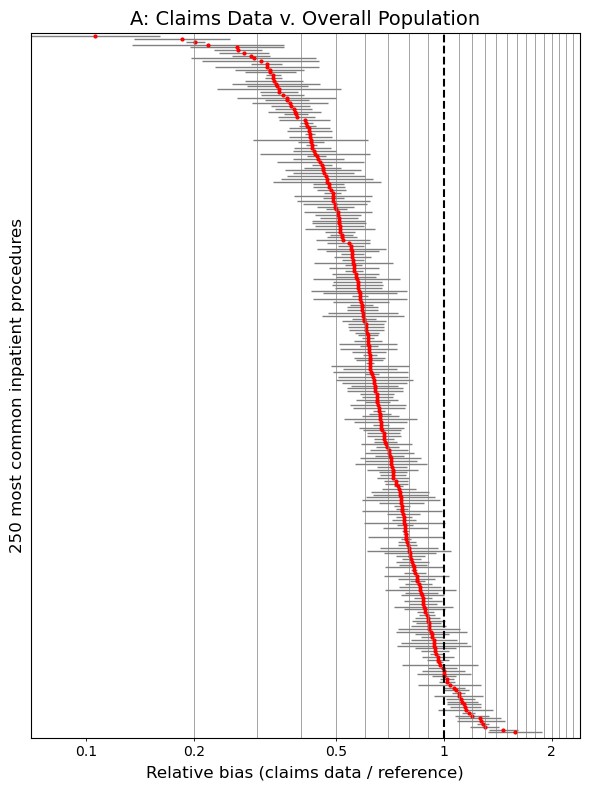

In [306]:
plt.figure(figsize=(6,8))

# df_temp = df_procs.sort_values(by = 'rate_SID', ascending=False)[1:101].sort_values(by='rel_bias').copy()
# df_temp = df_procs.copy()
plot_order = df_temp['procedure']

err = np.array([np.array(df_temp['rel_bias']        - df_temp['rel_bias_low'])  ,
                np.array(df_temp['rel_bias_high']   - df_temp['rel_bias'])   ])

plt.scatter(df_temp['rel_bias'],df_temp['procedure'],  s=4, zorder=2,
             color='red')
plt.barh(df_temp['procedure'], df_temp['rel_bias'], xerr=err, facecolor='none', 
         error_kw=dict(lw=1, capsize=0, capthick=0, ecolor='gray'), zorder=1)


plt.xscale('log')
plt.gca().invert_yaxis()

plt.xlabel('Relative bias (claims data / reference)', fontsize=12)
plt.ylabel('250 most common inpatient procedures', fontsize=12)

plt.title('A: Claims Data v. Overall Population', fontsize=14)


plt.axvline(1,linestyle='--', color='k', lw=1.5)
# plt.axvline(df_procs[df_procs.procedure == 'Overall Inpatient Visits'].rel_bias.values[0],linestyle=':', color='gray', lw=1)
plt.axvline(.2, color='gray', linewidth=0.5)
plt.axvline(.3, color='gray', linewidth=0.5)
plt.axvline(.4, color='gray', linewidth=0.5)
plt.axvline(.5, color='gray', linewidth=0.5)
plt.axvline(.6, color='gray', linewidth=0.5)
plt.axvline(.7, color='gray', linewidth=0.5)
plt.axvline(.8, color='gray', linewidth=0.5)
plt.axvline(.9, color='gray', linewidth=0.5)
plt.axvline(1.1, color='gray', linewidth=0.5)
plt.axvline(1.2, color='gray', linewidth=0.5)
plt.axvline(1.3, color='gray', linewidth=0.5)
plt.axvline(1.4, color='gray', linewidth=0.5)
plt.axvline(1.5, color='gray', linewidth=0.5)
plt.axvline(1.6, color='gray', linewidth=0.5)
plt.axvline(1.7, color='gray', linewidth=0.5)
plt.axvline(1.8, color='gray', linewidth=0.5)
plt.axvline(1.9, color='gray', linewidth=0.5)
plt.axvline(2.0, color='gray', linewidth=0.5)
plt.axvline(2.1, color='gray', linewidth=0.5)
plt.axvline(2.2, color='gray', linewidth=0.5)
plt.axvline(2.3, color='gray', linewidth=0.5)
plt.axvline(2.4, color='gray', linewidth=0.5)
plt.xlim([0.07, 2.4])

plt.ylim([251, -1])

ax = plt.gca()
locs = np.array([.1, 0.2, 0.5,  1, 2, 5, 10])
labels = np.array(['0.1', '0.2', '0.5', '1', '2', '5','10'])

ax.xaxis.set_minor_locator(ticker.FixedLocator(locs))
ax.xaxis.set_minor_formatter(ticker.FixedFormatter(labels))
ax.xaxis.set_major_locator(ticker.NullLocator())

ax.yaxis.set_major_locator(ticker.NullLocator())
ax.yaxis.set_minor_locator(ticker.NullLocator())

plt.tight_layout()
plt.savefig('caterpillar_whole.jpg', dpi = 800)

In [307]:
plot_order

262                   Subcutaneous contraceptive implant
44                                  Cardiac stress tests
127                                         Hemodialysis
105          Finger and other upper extremity amputation
7           Administration of diagnostic substances, NEC
                             ...                        
3      Administration and transfusion of bone marrow,...
131                                     Hip arthroplasty
31                                 Breast reconstruction
229                                        Prostatectomy
254                             Speech therapy treatment
Name: procedure, Length: 250, dtype: object

In [308]:
rate_tbl_all = df_temp[['PRCCSR', 'procedure', 'rate_SID', 'sid_low', 'sid_high', 'rate_MS', 'ms_low', 'ms_high', 'rel_bias', 'rel_bias_low', 'rel_bias_high']]

In [309]:
order_idx = {val: i for i, val in enumerate(plot_order)}

In [310]:
rate_tbl_all = rate_tbl_all.reset_index(drop = True)

In [311]:
rate_tbl_all

,PRCCSR,procedure,rate_SID,sid_low,sid_high,rate_MS,ms_low,ms_high,rel_bias,rel_bias_low,rel_bias_high
0,FRS013,Subcutaneous contraceptive implant,0.00903,0.00900,0.00906,0.00096,0.00056,0.00136,0.10629,0.06999,0.16143
1,MAM004,Cardiac stress tests,0.00939,0.00936,0.00942,0.00174,0.00120,0.00229,0.18582,0.13630,0.25333
2,ESA001,Hemodialysis,0.22782,0.22768,0.22797,0.04602,0.04325,0.04880,0.20202,0.19019,0.21459
3,MST026,Finger and other upper extremity amputation,0.00318,0.00317,0.00320,0.00070,0.00036,0.00104,0.21927,0.13432,0.35792
4,ADM020,"Administration of diagnostic substances, NEC",0.00692,0.00690,0.00695,0.00183,0.00128,0.00239,0.26475,0.19565,0.35826
...,...,...,...,...,...,...,...,...,...,...,...
245,ADM011,"Administration and transfusion of bone marrow,...",0.00546,0.00544,0.00549,0.00694,0.00586,0.00801,1.26964,1.08680,1.48323
246,MST007,Hip arthroplasty,0.08595,0.08586,0.08604,0.11063,0.10633,0.11494,1.28714,1.23799,1.33824
247,SKB004,Breast reconstruction,0.01518,0.01514,0.01521,0.01972,0.01790,0.02154,1.29921,1.18475,1.42472
248,MRS003,Prostatectomy,0.01259,0.01256,0.01262,0.01845,0.01669,0.02021,1.46563,1.33236,1.61224


In [312]:
sorted_rates = rate_tbl_all.sort_values(by='rel_bias', ascending=True)

In [313]:
sorted_rates.head(20)

,PRCCSR,procedure,rate_SID,sid_low,sid_high,rate_MS,ms_low,ms_high,rel_bias,rel_bias_low,rel_bias_high
0,FRS013,Subcutaneous contraceptive implant,0.00903,0.00900,0.00906,0.00096,0.00056,0.00136,0.10629,0.06999,0.16143
1,MAM004,Cardiac stress tests,0.00939,0.00936,0.00942,0.00174,0.00120,0.00229,0.18582,0.13630,0.25333
2,ESA001,Hemodialysis,0.22782,0.22768,0.22797,0.04602,0.04325,0.04880,0.20202,0.19019,0.21459
3,MST026,Finger and other upper extremity amputation,0.00318,0.00317,0.00320,0.00070,0.00036,0.00104,0.21927,0.13432,0.35792
4,ADM020,"Administration of diagnostic substances, NEC",0.00692,0.00690,0.00695,0.00183,0.00128,0.00239,0.26475,0.19565,0.35826
5,ESA005,Cardiac chest compression,0.02704,0.02699,0.02709,0.00720,0.00610,0.00830,0.26624,0.22856,0.31014
6,MAM002,Peripheral arterial pressure monitoring,0.02380,0.02375,0.02384,0.00659,0.00554,0.00764,0.27683,0.23602,0.32471
7,GIS017,Gastrostomy,0.03858,0.03852,0.03864,0.01117,0.00980,0.01254,0.28947,0.25610,0.32720
8,RAD004,"Radiation therapy, NEC",0.00356,0.00355,0.00358,0.00105,0.00063,0.00147,0.29379,0.19691,0.43834
9,MST025,Above knee and other proximal lower extremity ...,0.00383,0.00381,0.00385,0.00118,0.00073,0.00162,0.30773,0.21103,0.44875


In [314]:
# if the confidence intervals of the relative bias overlap 1 -> not statistically significant
sorted_rates['significant'] = np.where(
    (1 - sorted_rates['rel_bias_low']) * (1 - sorted_rates['rel_bias_high']) > 0, 1, 0)

In [315]:
sorted_rates[sorted_rates['significant'] == 0][['rel_bias_low', 'rel_bias_high', 'significant']]

,rel_bias_low,rel_bias_high,significant
174,0.59680,1.00781,0
184,0.60943,1.04970,0
193,0.68215,1.03128,0
198,0.68590,1.07867,0
204,0.72493,1.06286,0
205,0.77567,1.00566,0
209,0.81572,1.00413,0
211,0.80999,1.01577,0
212,0.74298,1.10860,0
213,0.73555,1.15675,0


In [316]:
sorted_rates['significant'].describe()

count   250.00000
mean      0.88000
std       0.32561
min       0.00000
25%       1.00000
50%       1.00000
75%       1.00000
max       1.00000
Name: significant, dtype: float64

In [317]:
sorted_rates['bias_pct'] = np.where(
    sorted_rates['rel_bias'] <= 1/1.9, 1, 0)
sorted_rates['bias_pct'].describe()

count   250.00000
mean      0.29600
std       0.45741
min       0.00000
25%       0.00000
50%       0.00000
75%       1.00000
max       1.00000
Name: bias_pct, dtype: float64

In [318]:
percentiles = [x * 0.1 for x in range(11, 21)]

In [319]:
percentiles.reverse()
for i in percentiles:
    sorted_rates['bias_pct'] = np.where(sorted_rates['rel_bias'] <= 1/i, 1, 0)
    print(round(sorted_rates['bias_pct'].mean() * 100, 1))

24.8
29.6
32.0
38.4
48.4
56.0
61.6
68.4
77.2
85.2


In [320]:
percentiles.reverse()
for i in percentiles:
    sorted_rates['bias_pct'] = np.where(sorted_rates['rel_bias'] >= i, 1, 0)
    print(round(sorted_rates['bias_pct'].mean() * 100, 1))

5.6
2.4
0.8
0.8
0.4
0.0
0.0
0.0
0.0
0.0


In [216]:
sorted_rates

,PRCCSR,procedure,rate_SID,sid_low,sid_high,rate_MS,ms_low,ms_high,rel_bias,rel_bias_low,rel_bias_high,significant,bias_pct
0,FRS013,Subcutaneous contraceptive implant,0.00903,0.00900,0.00906,0.00096,0.00056,0.00136,0.10629,0.06999,0.16143,1,0
1,MAM004,Cardiac stress tests,0.00939,0.00936,0.00942,0.00174,0.00120,0.00229,0.18582,0.13630,0.25333,1,0
2,ESA001,Hemodialysis,0.22782,0.22768,0.22797,0.04602,0.04325,0.04880,0.20202,0.19019,0.21459,1,0
3,MST026,Finger and other upper extremity amputation,0.00318,0.00317,0.00320,0.00070,0.00036,0.00104,0.21927,0.13432,0.35792,1,0
4,ADM020,"Administration of diagnostic substances, NEC",0.00692,0.00690,0.00695,0.00183,0.00128,0.00239,0.26475,0.19565,0.35826,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,ADM011,"Administration and transfusion of bone marrow,...",0.00546,0.00544,0.00549,0.00694,0.00586,0.00801,1.26964,1.08680,1.48323,1,0
246,MST007,Hip arthroplasty,0.08595,0.08586,0.08604,0.11063,0.10633,0.11494,1.28714,1.23799,1.33824,1,0
247,SKB004,Breast reconstruction,0.01518,0.01514,0.01521,0.01972,0.01790,0.02154,1.29921,1.18475,1.42472,1,0
248,MRS003,Prostatectomy,0.01259,0.01256,0.01262,0.01845,0.01669,0.02021,1.46563,1.33236,1.61224,1,0


In [217]:
rate_tbl_all.sort_values(by = 'rate_SID', ascending = False)

,PRCCSR,procedure,rate_SID,sid_low,sid_high,rate_MS,ms_low,ms_high,rel_bias,rel_bias_low,rel_bias_high
178,PGN002,Spontaneous vaginal delivery,1.09831,1.09799,1.09863,0.85784,0.84585,0.86983,0.78105,0.77021,0.79205
191,PGN003,Cesarean section,0.52761,0.52739,0.52783,0.43559,0.42705,0.44414,0.82559,0.80955,0.84195
177,PGN004,Assisted vaginal delivery,0.47862,0.47842,0.47883,0.37343,0.36552,0.38134,0.78021,0.76385,0.79692
117,PGN001,Fetal heart rate monitoring,0.42971,0.42951,0.42991,0.26690,0.26021,0.27359,0.62111,0.60574,0.63688
35,CAR024,Venous and arterial catheter placement,0.42951,0.42931,0.42971,0.18144,0.17592,0.18695,0.42243,0.40978,0.43546
...,...,...,...,...,...,...,...,...,...,...,...
91,ESA002,Extracorporeal membrane oxygenation,0.00301,0.00299,0.00303,0.00174,0.00120,0.00229,0.57977,0.42525,0.79044
52,EYP001,Eye procedures,0.00296,0.00294,0.00297,0.00140,0.00091,0.00188,0.47240,0.33405,0.66805
37,PNS004,Nerve repair,0.00287,0.00286,0.00289,0.00122,0.00077,0.00167,0.42498,0.29341,0.61553
225,CNS012,CNS neurostimulator procedures,0.00287,0.00285,0.00288,0.00279,0.00211,0.00348,0.97379,0.76214,1.24422


In [218]:
sid_rate_order = pd.DataFrame(rate_tbl_all.sort_values(by = 'rate_SID', ascending = False)['procedure']).reset_index(drop = True)
sid_rate_order['order'] = sid_rate_order.index

In [219]:
sid_rate_order

,procedure,order
0,Spontaneous vaginal delivery,0
1,Cesarean section,1
2,Assisted vaginal delivery,2
3,Fetal heart rate monitoring,3
4,Venous and arterial catheter placement,4
...,...,...
245,Extracorporeal membrane oxygenation,245
246,Eye procedures,246
247,Nerve repair,247
248,CNS neurostimulator procedures,248


In [220]:
rate_tbl_all.to_csv('rate_tbl_all.csv', index = False)

## Insured Subgroup

In [221]:
df

,Unnamed: 0,MSA,EGEOLOC,Total Pop,Square Miles,frac_female,frac_white,frac_black,frac_hispanic,frac_asian,...,Urinary tract repair,Vaccinations,Venous and arterial catheter placement,Ventriculostomy [percutaneous approach],Vertebral discectomy,Vessel repair and replacement,Vulvar laceration repair,Isolation procedures,Male perineum procedures,Cosmetic procedures
0,0,13820,41,1149440,5279.53000,0.51894,0.63515,0.28736,0.04426,0.01408,...,0.00177,0.06548,0.36282,0.00885,0.18937,0.01593,0.03894,0.00000,0.00177,0.00531
1,1,20020,41,148252,1716.08400,0.51877,0.69869,0.23647,0.03358,0.00737,...,0.00000,0.05208,0.42969,0.01302,0.24740,0.01302,0.02604,0.00000,0.01302,0.00000
2,2,0,41,1142642,28989.20900,0.51190,0.68523,0.23799,0.04776,0.00544,...,0.00549,0.04937,0.33646,0.00549,0.17006,0.00914,0.05120,0.00000,0.00549,0.00000
3,3,19460,41,152271,1270.28300,0.50964,0.75817,0.12233,0.07018,0.00542,...,0.00000,0.00000,0.19202,0.00000,0.26883,0.03840,0.02560,0.00000,0.00000,0.00000
4,4,17980,41,57952,641.17000,0.51924,0.46066,0.43412,0.05491,0.00873,...,0.00000,0.32381,0.41633,0.00000,0.09252,0.04626,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,498,29404,20,168524,271.84400,0.50543,0.75828,0.07224,0.13071,0.01555,...,0.00000,0.00000,0.18495,0.01681,0.01681,0.00000,0.06725,0.00000,0.00000,0.01681
498,499,43100,20,115178,511.52700,0.49674,0.84231,0.01924,0.06368,0.05714,...,0.00000,0.00000,0.21530,0.00000,0.10765,0.00000,0.00000,0.00000,0.00000,0.00000
499,500,0,59,402371,89062.30400,0.48803,0.84816,0.00590,0.08990,0.00815,...,0.00000,0.06582,0.14480,0.00000,0.09215,0.02633,0.07898,0.00000,0.00000,0.00000
500,501,16220,59,80333,5340.54100,0.49782,0.86689,0.01076,0.08449,0.00580,...,0.00000,0.00000,0.23651,0.00000,0.05913,0.00000,0.17738,0.00000,0.00000,0.00000


In [222]:
df_temp = df[['MSA', 'EGEOLOC']].copy()
df_temp['Pop Insured'] = df['Total Pop'] * df['frac_has_insurance'] * (1 - df['frac_over_65'] - df['frac_under_18'])

df_temp = pd.merge(df_temp, 
                  df_sid_counts_insured[df_sid_counts_insured['PRCCSR DESCRIPTION'].isin(procedures)],
                  on=['MSA', 'EGEOLOC'])
df_sid = df_temp[['MSA', 'EGEOLOC', 'State Name', 'Pop Insured']].drop_duplicates()

for proc in procedures:
    df_sid = pd.merge(df_sid, 
                      df_temp[df_temp['PRCCSR DESCRIPTION'] == proc][['MSA', 'EGEOLOC', 'count']], 
                      on=['MSA', 'EGEOLOC'], 
                      how='left')
    df_sid['count'] = df_sid['count'].fillna(0) / df_sid['Pop Insured'] * 100
    df_sid.rename(columns={'count': proc}, inplace=True)

In [223]:
df_sid

,MSA,EGEOLOC,State Name,Pop Insured,"Abdominal wall procedures, NEC",Abdominal wall repair (including hernia),Above knee and other proximal lower extremity amputation,"Administration and transfusion of bone marrow, stem cells, pancreatic islet cells, and t-cells",Administration of albumin and globulin,Administration of anti-inflammatory agents,...,Urinary tract repair,Vaccinations,Venous and arterial catheter placement,Ventriculostomy [percutaneous approach],Vertebral discectomy,Vessel repair and replacement,Vulvar laceration repair,Isolation procedures,Male perineum procedures,Cosmetic procedures
0,41940,62,California,1205633.33540,0.00937,0.02933,0.00108,0.00531,0.00976,0.00663,...,0.00672,0.01756,0.23558,0.00502,0.02889,0.01183,0.10606,0.00348,0.00137,0.00203
1,17020,62,California,127295.35921,0.01651,0.08479,0.00157,0.00314,0.00394,0.03755,...,0.01021,0.04100,0.31342,0.00472,0.06818,0.02748,0.10520,0.00000,0.00157,0.00078
2,40900,62,California,1330767.39991,0.01478,0.03895,0.00395,0.00557,0.01301,0.00382,...,0.00694,0.10615,0.38085,0.00785,0.07153,0.02137,0.11409,0.00660,0.00158,0.00158
3,41884,62,California,1051757.69465,0.00837,0.01992,0.00209,0.00571,0.01540,0.00699,...,0.00742,0.06075,0.25823,0.00813,0.03503,0.01574,0.10377,0.00314,0.00366,0.00566
4,31084,62,California,5651204.21458,0.01681,0.04134,0.00304,0.00574,0.00894,0.01911,...,0.00961,0.19116,0.46846,0.00993,0.05035,0.01566,0.07709,0.00165,0.00179,0.00191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,35614,11,New Jersey,2264565.67190,0.01831,0.04905,0.00327,0.00504,0.00895,0.01201,...,0.00649,0.22381,0.41558,0.00614,0.06388,0.01539,0.04845,0.00141,0.00110,0.00163
71,45940,11,New Jersey,207783.88886,0.02297,0.04640,0.00457,0.00330,0.00717,0.01342,...,0.00431,0.12154,0.59178,0.00783,0.06852,0.00568,0.06883,0.00048,0.00385,0.00192
72,36140,11,New Jersey,47684.36972,0.01871,0.07066,0.00387,0.00210,0.02291,0.00839,...,0.01049,0.10854,0.86433,0.00629,0.12970,0.01468,0.04533,0.00000,0.00000,0.00000
73,47220,11,New Jersey,75901.48710,0.03070,0.04878,0.00909,0.00258,0.04983,0.01287,...,0.01683,0.11964,0.85425,0.00642,0.08241,0.02313,0.08300,0.00000,0.00240,0.00120


In [224]:
df_sid['Overall Inpatient Visits'].sum()

np.float64(576.1434679259795)

In [225]:
(df_sid['Overall Inpatient Visits'] * df_sid['Pop Insured']).sum()

np.float64(274916000.00000006)

In [226]:
#for each procedure, estimate the rate in MS and SID

df_procs = pd.DataFrame([], columns = ['procedure', 'rate_MS', 'rate_SID', 'rel_bias', 'rel_bias_low', 'rel_bias_high', 'ms_low', 'ms_high', 'sid_low', 'sid_high'])
ii = 0
for proc in procedures:
    df_temp = pd.merge(df_sid[['MSA', 'EGEOLOC', 'Pop Insured', proc]], df[['MSA', 'EGEOLOC', proc, 'Total Pop', 'mem_days']], on=['MSA', 'EGEOLOC'], how='outer').rename(columns = {proc+'_x': 'sid', proc+'_y': 'ms'}).fillna(0)
    df_temp = df_temp[df_temp.EGEOLOC.isin([11, 18, 22, 35, 62])]
    rate_ms = (df_temp.ms * df_temp.mem_days).sum() / df_temp.mem_days.sum()
    rate_sid = (df_temp.sid * df_temp['Pop Insured']).sum() / df_temp['Pop Insured'].sum()
    rel_bias = rate_ms / rate_sid
    err_rate_ms = (rate_ms / df_temp.mem_days.sum() * 36500) ** 0.5
    err_rate_sid = (rate_sid / df_temp['Pop Insured'].sum()) ** 0.5
    err_log_rel_bias = ((err_rate_ms / rate_ms)**2 + (err_rate_sid / rate_sid)**2) ** 0.5
    df_procs.loc[ii] = [proc, rate_ms, rate_sid, rel_bias, np.exp(np.log(rel_bias) - 1.96 * err_log_rel_bias), np.exp(np.log(rel_bias) + 1.96 * err_log_rel_bias), (rate_ms -1.96 * err_rate_ms), (rate_ms + 1.96 * err_rate_ms), (rate_sid -1.96 * err_rate_sid), (rate_sid + 1.96 * err_rate_sid)]
    ii += 1


In [227]:
df_procs = pd.merge(df_procs, distinct_procs, left_on='procedure', right_on='PRCCSR DESCRIPTION', how='left')
df_procs = df_procs.drop('PRCCSR DESCRIPTION', axis=1).reset_index(drop = True)

In [228]:
df_procs_inpat = df_procs[df_procs.procedure == 'Overall Inpatient Visits']

In [229]:
# subset list of procedures
df_procs = df_procs[df_procs['procedure'].isin(proc_list)]

In [230]:
df_procs.sort_values(by = 'rate_SID', ascending=False).rel_bias.describe()

count   250.00000
mean      0.64731
std       0.22994
min       0.09922
25%       0.48508
50%       0.61938
75%       0.77802
max       1.49821
Name: rel_bias, dtype: float64

In [231]:
np.percentile(df_procs.sort_values(by = 'rate_SID', ascending=False).rel_bias, 5)

np.float64(0.30864985995618716)

In [232]:
np.percentile(df_procs.sort_values(by = 'rate_SID', ascending=False).rel_bias, 95)

np.float64(1.062866992329295)

In [233]:
df_procs_inpat.rel_bias.values[0]

np.float64(0.6893896296886401)

In [234]:
df_procs_inpat

,procedure,rate_MS,rate_SID,rel_bias,rel_bias_low,rel_bias_high,ms_low,ms_high,sid_low,sid_high,PRCCSR
274,Overall Inpatient Visits,5.00622,7.26181,0.68939,0.68541,0.69339,4.97725,5.03518,7.26095,7.26267,XXX


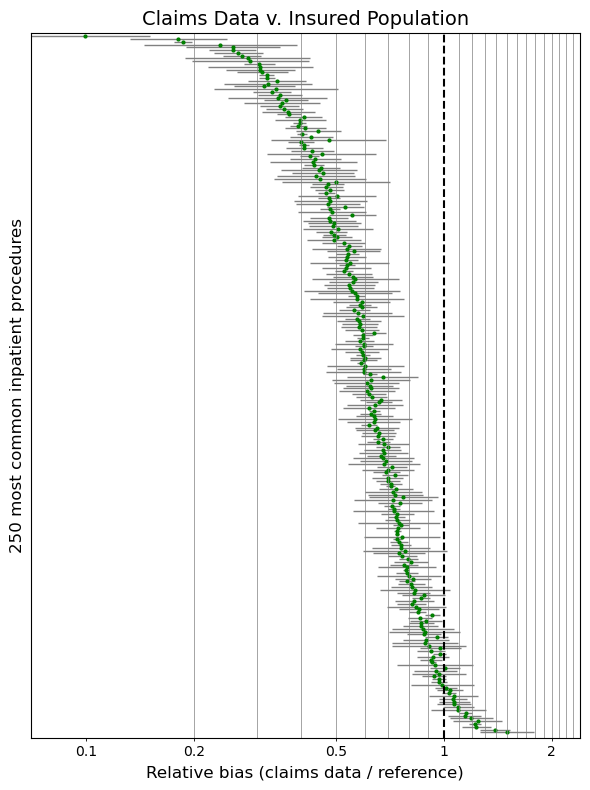

In [236]:
plt.figure(figsize=(6,8))

# df_temp = df_procs.sort_values(by = 'rate_SID', ascending=False)[1:251].sort_values(by='rel_bias').copy()
# df_temp = df_procs.sort_values(by = 'rate_SID', ascending=False)[1:101].sort_values(by='rel_bias').copy()
# df_temp = df_procs.copy()
df_procs['procedure'] = pd.Categorical(df_procs['procedure'], categories=plot_order, ordered=True)
df_temp = df_procs[df_procs.procedure.isin(plot_order)].sort_values(by = 'procedure').copy()

err = np.array([np.array(df_temp['rel_bias']        - df_temp['rel_bias_low'])  ,
                np.array(df_temp['rel_bias_high']   - df_temp['rel_bias'])   ])

plt.scatter(df_temp['rel_bias'],df_temp['procedure'],  s=4, zorder=2,
             color='green')
plt.barh(df_temp['procedure'], df_temp['rel_bias'], xerr=err, facecolor='none', 
         error_kw=dict(lw=1, capsize=0, capthick=0, ecolor='gray'), zorder=1)


plt.xscale('log')
plt.gca().invert_yaxis()

plt.xlabel('Relative bias (claims data / reference)', fontsize=12)
plt.ylabel('250 most common inpatient procedures', fontsize=12)

plt.title('Claims Data v. Insured Population', fontsize=14)


plt.axvline(1,linestyle='--', color='k', lw=1.5)
#plt.axvline(df_procs[df_procs.procedure == 'Overall Inpatient Visits'].rel_bias.values[0],linestyle=':', color='gray', lw=1)
plt.axvline(.2, color='gray', linewidth=0.5)
plt.axvline(.3, color='gray', linewidth=0.5)
plt.axvline(.4, color='gray', linewidth=0.5)
plt.axvline(.5, color='gray', linewidth=0.5)
plt.axvline(.6, color='gray', linewidth=0.5)
plt.axvline(.7, color='gray', linewidth=0.5)
plt.axvline(.8, color='gray', linewidth=0.5)
plt.axvline(.9, color='gray', linewidth=0.5)
plt.axvline(1.1, color='gray', linewidth=0.5)
plt.axvline(1.2, color='gray', linewidth=0.5)
plt.axvline(1.3, color='gray', linewidth=0.5)
plt.axvline(1.4, color='gray', linewidth=0.5)
plt.axvline(1.5, color='gray', linewidth=0.5)
plt.axvline(1.6, color='gray', linewidth=0.5)
plt.axvline(1.7, color='gray', linewidth=0.5)
plt.axvline(1.8, color='gray', linewidth=0.5)
plt.axvline(1.9, color='gray', linewidth=0.5)
plt.axvline(2.0, color='gray', linewidth=0.5)
plt.axvline(2.1, color='gray', linewidth=0.5)
plt.axvline(2.2, color='gray', linewidth=0.5)
plt.axvline(2.3, color='gray', linewidth=0.5)
plt.axvline(2.4, color='gray', linewidth=0.5)
plt.xlim([0.07, 2.4])

plt.ylim([251, -1])

ax = plt.gca()
locs = np.array([.1, 0.2, 0.5,  1, 2, 5, 10])
labels = np.array(['0.1', '0.2', '0.5', '1', '2', '5','10'])

ax.xaxis.set_minor_locator(ticker.FixedLocator(locs))
ax.xaxis.set_minor_formatter(ticker.FixedFormatter(labels))
ax.xaxis.set_major_locator(ticker.NullLocator())

ax.yaxis.set_major_locator(ticker.NullLocator())
ax.yaxis.set_minor_locator(ticker.NullLocator())

plt.tight_layout()
plt.savefig('caterpillar_insured.jpg', dpi = 800)

In [237]:
rate_tbl_insured = df_temp[['PRCCSR', 'procedure', 'rate_SID', 'sid_low', 'sid_high', 'rate_MS', 'ms_low', 'ms_high', 'rel_bias', 'rel_bias_low', 'rel_bias_high']]

In [238]:
rate_tbl_insured

,PRCCSR,procedure,rate_SID,sid_low,sid_high,rate_MS,ms_low,ms_high,rel_bias,rel_bias_low,rel_bias_high
262,FRS013,Subcutaneous contraceptive implant,0.00967,0.00964,0.00970,0.00096,0.00056,0.00136,0.09922,0.06533,0.15069
44,MAM004,Cardiac stress tests,0.00963,0.00960,0.00966,0.00174,0.00120,0.00229,0.18124,0.13294,0.24709
127,ESA001,Hemodialysis,0.24676,0.24660,0.24691,0.04602,0.04325,0.04880,0.18652,0.17560,0.19812
105,MST026,Finger and other upper extremity amputation,0.00294,0.00292,0.00296,0.00070,0.00036,0.00104,0.23742,0.14544,0.38756
7,ADM020,"Administration of diagnostic substances, NEC",0.00711,0.00709,0.00714,0.00183,0.00128,0.00239,0.25757,0.19035,0.34854
...,...,...,...,...,...,...,...,...,...,...,...
3,ADM011,"Administration and transfusion of bone marrow,...",0.00558,0.00556,0.00561,0.00694,0.00586,0.00801,1.24217,1.06329,1.45115
131,MST007,Hip arthroplasty,0.09056,0.09046,0.09066,0.11063,0.10633,0.11494,1.22165,1.17500,1.27015
31,SKB004,Breast reconstruction,0.01601,0.01597,0.01605,0.01972,0.01790,0.02154,1.23164,1.12313,1.35063
229,MRS003,Prostatectomy,0.01328,0.01325,0.01332,0.01845,0.01669,0.02021,1.38915,1.26282,1.52810


In [239]:
sorted_rates = rate_tbl_insured.sort_values(by='rel_bias', ascending=True)

In [240]:
# if the confidence intervals of the relative bias overlap 1 -> not statistically significant
sorted_rates['significant'] = np.where(
    (1 - sorted_rates['rel_bias_low']) * (1 - sorted_rates['rel_bias_high']) > 0, 1, 0)

In [241]:
sorted_rates[sorted_rates['significant'] == 0][['rel_bias_low', 'rel_bias_high', 'significant']]

,rel_bias_low,rel_bias_high,significant
255,0.59380,1.02278,0
169,0.66113,1.03972,0
69,0.69219,1.01487,0
260,0.71671,1.06940,0
52,0.76400,1.00672,0
221,0.70451,1.10795,0
284,0.71437,1.09578,0
286,0.76922,1.03638,0
80,0.71693,1.15341,0
63,0.84169,1.00798,0


In [242]:
sorted_rates['significant'].describe()

count   250.00000
mean      0.87600
std       0.33024
min       0.00000
25%       1.00000
50%       1.00000
75%       1.00000
max       1.00000
Name: significant, dtype: float64

In [243]:
sorted_rates['bias_pct'] = np.where(
    sorted_rates['rel_bias'] >= 1.5, 1, 0)
sorted_rates['bias_pct'].describe()

count   250.00000
mean      0.00000
std       0.00000
min       0.00000
25%       0.00000
50%       0.00000
75%       0.00000
max       0.00000
Name: bias_pct, dtype: float64

In [244]:
percentiles = [x * 0.1 for x in range(11, 21)]

In [245]:
percentiles.reverse()
for i in percentiles:
    sorted_rates['bias_pct'] = np.where(sorted_rates['rel_bias'] <= 1/i, 1, 0)
    print(round(sorted_rates['bias_pct'].mean() * 100, 1))

27.6
29.6
35.2
42.0
51.6
57.2
64.0
74.0
80.8
86.4


In [246]:
percentiles.reverse()
for i in percentiles:
    sorted_rates['bias_pct'] = np.where(sorted_rates['rel_bias'] >= i, 1, 0)
    print(round(sorted_rates['bias_pct'].mean() * 100, 1))

3.2
2.0
0.8
0.4
0.0
0.0
0.0
0.0
0.0
0.0


In [247]:
pd.options.display.float_format = '{:.5f}'.format

In [321]:
pd.set_option('display.float_format', lambda x: '{:.5f}'.format(x))
rate_tbl_insured_export = rate_tbl_insured.copy()
rate_tbl_insured_export['sid_err'] = round(rate_tbl_insured['sid_high'] - rate_tbl_insured['rate_SID'], 5)
rate_tbl_insured_export['rate / 100 patient years (reference)'] = round(rate_tbl_insured['rate_SID'], 5).map('{:.5f}'.format) + ' ± ' + rate_tbl_insured_export['sid_err'].map('{:.5f}'.format)
rate_tbl_insured_export['relative bias'] = round(rate_tbl_insured['rel_bias'], 3).map('{:.3f}'.format) + ' [' + round(rate_tbl_insured['rel_bias_low'], 3).map('{:.3f}'.format) + ', ' + round(rate_tbl_insured['rel_bias_high'], 3).map('{:.3f}'.format) + ']'
rate_tbl_insured_export = pd.merge(rate_tbl_insured_export, sid_rate_order, on = 'procedure', how = 'left').sort_values(by = 'order')

In [322]:
rate_tbl_insured_export

,PRCCSR,procedure,rate_SID,sid_low,sid_high,rate_MS,ms_low,ms_high,rel_bias,rel_bias_low,rel_bias_high,sid_err,rate / 100 patient years (reference),relative bias,order
178,PGN002,Spontaneous vaginal delivery,1.15958,1.15923,1.15992,0.85784,0.84585,0.86983,0.73979,0.72952,0.75020,0.00034,1.15958 ± 0.00034,"0.740 [0.730, 0.750]",0
191,PGN003,Cesarean section,0.55615,0.55592,0.55639,0.43559,0.42705,0.44414,0.78323,0.76801,0.79875,0.00024,0.55615 ± 0.00024,"0.783 [0.768, 0.799]",1
177,PGN004,Assisted vaginal delivery,0.50429,0.50407,0.50452,0.37343,0.36552,0.38134,0.74050,0.72497,0.75636,0.00023,0.50429 ± 0.00023,"0.741 [0.725, 0.756]",2
117,PGN001,Fetal heart rate monitoring,0.45529,0.45507,0.45550,0.26690,0.26021,0.27359,0.58622,0.57171,0.60110,0.00021,0.45529 ± 0.00021,"0.586 [0.572, 0.601]",3
35,CAR024,Venous and arterial catheter placement,0.45189,0.45167,0.45210,0.18144,0.17592,0.18695,0.40151,0.38949,0.41390,0.00021,0.45189 ± 0.00021,"0.402 [0.389, 0.414]",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,ESA002,Extracorporeal membrane oxygenation,0.00315,0.00313,0.00317,0.00174,0.00120,0.00229,0.55421,0.40650,0.75559,0.00002,0.00315 ± 0.00002,"0.554 [0.407, 0.756]",245
52,EYP001,Eye procedures,0.00280,0.00278,0.00282,0.00140,0.00091,0.00188,0.49858,0.35256,0.70507,0.00002,0.00280 ± 0.00002,"0.499 [0.353, 0.705]",246
37,PNS004,Nerve repair,0.00256,0.00255,0.00258,0.00122,0.00077,0.00167,0.47673,0.32915,0.69050,0.00002,0.00256 ± 0.00002,"0.477 [0.329, 0.691]",247
225,CNS012,CNS neurostimulator procedures,0.00295,0.00294,0.00297,0.00279,0.00211,0.00348,0.94543,0.73994,1.20798,0.00002,0.00295 ± 0.00002,"0.945 [0.740, 1.208]",248


In [324]:
rate_tbl_insured_export.to_csv('rate_tbl_insured.csv', index = False)

## Commercially Insured Subgroup

In [325]:
df

,Unnamed: 0,MSA,EGEOLOC,Total Pop,Square Miles,frac_female,frac_white,frac_black,frac_hispanic,frac_asian,...,Urinary tract repair,Vaccinations,Venous and arterial catheter placement,Ventriculostomy [percutaneous approach],Vertebral discectomy,Vessel repair and replacement,Vulvar laceration repair,Isolation procedures,Male perineum procedures,Cosmetic procedures
0,0,13820,41,1149440,5279.53000,0.51894,0.63515,0.28736,0.04426,0.01408,...,0.00177,0.06548,0.36282,0.00885,0.18937,0.01593,0.03894,0.00000,0.00177,0.00531
1,1,20020,41,148252,1716.08400,0.51877,0.69869,0.23647,0.03358,0.00737,...,0.00000,0.05208,0.42969,0.01302,0.24740,0.01302,0.02604,0.00000,0.01302,0.00000
2,2,0,41,1142642,28989.20900,0.51190,0.68523,0.23799,0.04776,0.00544,...,0.00549,0.04937,0.33646,0.00549,0.17006,0.00914,0.05120,0.00000,0.00549,0.00000
3,3,19460,41,152271,1270.28300,0.50964,0.75817,0.12233,0.07018,0.00542,...,0.00000,0.00000,0.19202,0.00000,0.26883,0.03840,0.02560,0.00000,0.00000,0.00000
4,4,17980,41,57952,641.17000,0.51924,0.46066,0.43412,0.05491,0.00873,...,0.00000,0.32381,0.41633,0.00000,0.09252,0.04626,0.00000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,498,29404,20,168524,271.84400,0.50543,0.75828,0.07224,0.13071,0.01555,...,0.00000,0.00000,0.18495,0.01681,0.01681,0.00000,0.06725,0.00000,0.00000,0.01681
498,499,43100,20,115178,511.52700,0.49674,0.84231,0.01924,0.06368,0.05714,...,0.00000,0.00000,0.21530,0.00000,0.10765,0.00000,0.00000,0.00000,0.00000,0.00000
499,500,0,59,402371,89062.30400,0.48803,0.84816,0.00590,0.08990,0.00815,...,0.00000,0.06582,0.14480,0.00000,0.09215,0.02633,0.07898,0.00000,0.00000,0.00000
500,501,16220,59,80333,5340.54100,0.49782,0.86689,0.01076,0.08449,0.00580,...,0.00000,0.00000,0.23651,0.00000,0.05913,0.00000,0.17738,0.00000,0.00000,0.00000


In [326]:
df_temp = df[['MSA', 'EGEOLOC']].copy()
df_temp['Pop Commercially Insured'] = df['Total Pop'] * df['frac_private_insurance'] * (1 - df['frac_over_65'] - df['frac_under_18'])

df_temp = pd.merge(df_temp, 
                  df_sid_counts_commercial[df_sid_counts_commercial['PRCCSR DESCRIPTION'].isin(procedures)],
                  on=['MSA', 'EGEOLOC'])
df_sid = df_temp[['MSA', 'EGEOLOC', 'State Name', 'Pop Commercially Insured']].drop_duplicates()

for proc in procedures:
    df_sid = pd.merge(df_sid, 
                      df_temp[df_temp['PRCCSR DESCRIPTION'] == proc][['MSA', 'EGEOLOC', 'count']], 
                      on=['MSA', 'EGEOLOC'], 
                      how='left')
    df_sid['count'] = df_sid['count'].fillna(0) / df_sid['Pop Commercially Insured'] * 100
    df_sid.rename(columns={'count': proc}, inplace=True)

In [327]:
# percent of people aged 18-64 who are commercially insured
df[['Total Pop', 'frac_private_insurance', 'frac_over_65', 'frac_under_18']]

,Total Pop,frac_private_insurance,frac_over_65,frac_under_18
0,1149440,0.75065,0.15744,0.23033
1,148252,0.65644,0.18288,0.22777
2,1142642,0.66250,0.18550,0.22247
3,152271,0.73522,0.17344,0.22690
4,57952,0.61012,0.13855,0.24450
...,...,...,...,...
497,168524,0.76534,0.13638,0.23227
498,115178,0.84247,0.17467,0.22316
499,402371,0.76160,0.16057,0.23418
500,80333,0.73407,0.14415,0.24135


In [328]:
df_sid

,MSA,EGEOLOC,State Name,Pop Commercially Insured,"Abdominal wall procedures, NEC",Abdominal wall repair (including hernia),Above knee and other proximal lower extremity amputation,"Administration and transfusion of bone marrow, stem cells, pancreatic islet cells, and t-cells",Administration of albumin and globulin,Administration of anti-inflammatory agents,...,Urinary tract repair,Vaccinations,Venous and arterial catheter placement,Ventriculostomy [percutaneous approach],Vertebral discectomy,Vessel repair and replacement,Vulvar laceration repair,Isolation procedures,Male perineum procedures,Cosmetic procedures
0,41940,62,California,1046895.46198,0.00659,0.01990,0.00048,0.00478,0.00767,0.00473,...,0.00568,0.01453,0.11991,0.00306,0.02549,0.00976,0.08573,0.00248,0.00138,0.00210
1,17020,62,California,88505.01143,0.00452,0.03275,0.00000,0.00113,0.00340,0.00790,...,0.00790,0.01919,0.11192,0.00452,0.05304,0.01581,0.09036,0.00000,0.00000,0.00000
2,40900,62,California,1039224.28324,0.00941,0.02375,0.00112,0.00483,0.00746,0.00252,...,0.00521,0.06074,0.16815,0.00467,0.06059,0.01406,0.09854,0.00404,0.00096,0.00144
3,41884,62,California,915434.18592,0.00459,0.01289,0.00076,0.00590,0.00950,0.00377,...,0.00584,0.04981,0.12185,0.00437,0.02856,0.01098,0.09994,0.00273,0.00169,0.00350
4,31084,62,California,4213001.38379,0.00820,0.02396,0.00090,0.00429,0.00487,0.01277,...,0.00682,0.06567,0.20610,0.00558,0.04316,0.00948,0.06235,0.00017,0.00078,0.00166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,35614,11,New Jersey,1952443.25812,0.01333,0.03962,0.00169,0.00492,0.00640,0.00747,...,0.00564,0.16571,0.23298,0.00460,0.06240,0.01175,0.03570,0.00082,0.00072,0.00154
71,45940,11,New Jersey,177993.26021,0.01559,0.03165,0.00112,0.00329,0.00612,0.01175,...,0.00335,0.09672,0.30281,0.00538,0.06309,0.00270,0.03927,0.00000,0.00112,0.00112
72,36140,11,New Jersey,40054.31533,0.01248,0.03726,0.00231,0.00000,0.01248,0.00499,...,0.00749,0.06488,0.34163,0.00499,0.08969,0.00499,0.03419,0.00000,0.00000,0.00000
73,47220,11,New Jersey,56825.69808,0.01565,0.02956,0.00682,0.00169,0.02390,0.00968,...,0.01187,0.08299,0.35990,0.00346,0.07100,0.01859,0.04543,0.00000,0.00160,0.00000


In [329]:
df_sid['Overall Inpatient Visits'].sum()

np.float64(316.52970792940533)

In [330]:
(df_sid['Overall Inpatient Visits'] * df_sid['Pop Commercially Insured']).sum()

np.float64(124061900.0)

In [331]:
#for each procedure, estimate the rate in MS and SID

df_procs = pd.DataFrame([], columns = ['procedure', 'rate_MS', 'rate_SID', 'rel_bias', 'rel_bias_low', 'rel_bias_high', 'ms_low', 'ms_high', 'sid_low', 'sid_high'])
ii = 0
for proc in procedures:
    df_temp = pd.merge(df_sid[['MSA', 'EGEOLOC', 'Pop Commercially Insured', proc]], df[['MSA', 'EGEOLOC', proc, 'Total Pop', 'mem_days']], on=['MSA', 'EGEOLOC'], how='outer').rename(columns = {proc+'_x': 'sid', proc+'_y': 'ms'}).fillna(0)
    df_temp = df_temp[df_temp.EGEOLOC.isin([11, 18, 22, 35, 62])]
    rate_ms = (df_temp.ms * df_temp.mem_days).sum() / df_temp.mem_days.sum()
    rate_sid = (df_temp.sid * df_temp['Pop Commercially Insured']).sum() / df_temp['Pop Commercially Insured'].sum()
    rel_bias = rate_ms / rate_sid
    err_rate_ms = (rate_ms / df_temp.mem_days.sum() * 36500) ** 0.5
    err_rate_sid = (rate_sid / df_temp['Pop Commercially Insured'].sum()) ** 0.5
    err_log_rel_bias = ((err_rate_ms / rate_ms)**2 + (err_rate_sid / rate_sid)**2) ** 0.5
    df_procs.loc[ii] = [proc, rate_ms, rate_sid, rel_bias, np.exp(np.log(rel_bias) - 1.96 * err_log_rel_bias), np.exp(np.log(rel_bias) + 1.96 * err_log_rel_bias), (rate_ms -1.96 * err_rate_ms), (rate_ms + 1.96 * err_rate_ms), (rate_sid -1.96 * err_rate_sid), (rate_sid + 1.96 * err_rate_sid)]
    ii += 1


In [332]:
df_procs = pd.merge(df_procs, distinct_procs, left_on='procedure', right_on='PRCCSR DESCRIPTION', how='left')
df_procs = df_procs.drop('PRCCSR DESCRIPTION', axis=1).reset_index(drop = True)

In [333]:
df_procs_inpat = df_procs[df_procs.procedure == 'Overall Inpatient Visits']
# subset list of procedures
df_procs = df_procs[df_procs['procedure'].isin(proc_list)]

In [334]:
df_procs

,procedure,rate_MS,rate_SID,rel_bias,rel_bias_low,rel_bias_high,ms_low,ms_high,sid_low,sid_high,PRCCSR
0,"Abdominal wall procedures, NEC",0.01112,0.01026,1.08374,0.95852,1.22533,0.00976,0.01249,0.01023,0.01030,GNR008
1,Abdominal wall repair (including hernia),0.03215,0.02943,1.09253,1.01640,1.17436,0.02983,0.03447,0.02937,0.02949,GNR002
2,Above knee and other proximal lower extremity ...,0.00118,0.00130,0.90424,0.62002,1.31873,0.00073,0.00162,0.00129,0.00132,MST025
3,"Administration and transfusion of bone marrow,...",0.00694,0.00490,1.41517,1.21134,1.65330,0.00586,0.00801,0.00488,0.00493,ADM011
4,Administration of albumin and globulin,0.00611,0.00678,0.90095,0.76337,1.06333,0.00510,0.00712,0.00675,0.00681,ADM003
...,...,...,...,...,...,...,...,...,...,...,...
288,Venous and arterial catheter placement,0.18144,0.20176,0.89927,0.87234,0.92703,0.17592,0.18695,0.20160,0.20192,CAR024
289,Ventriculostomy [percutaneous approach],0.00480,0.00470,1.02129,0.84714,1.23123,0.00390,0.00570,0.00467,0.00472,CNS005
290,Vertebral discectomy,0.06648,0.05788,1.14859,1.09233,1.20776,0.06315,0.06982,0.05780,0.05797,MST016
291,Vessel repair and replacement,0.01357,0.01164,1.16587,1.04318,1.30298,0.01206,0.01508,0.01160,0.01168,CAR012


In [335]:
df_procs.sort_values(by = 'rate_SID', ascending=False).rel_bias.describe()

count   250.00000
mean      1.02957
std       0.21841
min       0.40851
25%       0.91820
50%       1.02595
75%       1.13613
max       2.58923
Name: rel_bias, dtype: float64

In [336]:
np.percentile(df_procs.sort_values(by = 'rate_SID', ascending=False).rel_bias, 5)

np.float64(0.7137152298373077)

In [337]:
np.percentile(df_procs.sort_values(by = 'rate_SID', ascending=False).rel_bias, 95)

np.float64(1.32110660664035)

In [338]:
df_procs_inpat

,procedure,rate_MS,rate_SID,rel_bias,rel_bias_low,rel_bias_high,ms_low,ms_high,sid_low,sid_high,PRCCSR
274,Overall Inpatient Visits,5.00622,4.12257,1.21434,1.20733,1.22139,4.97725,5.03518,4.12185,4.12330,XXX


In [339]:
df_procs_inpat.rel_bias.values[0]

np.float64(1.214343464878366)

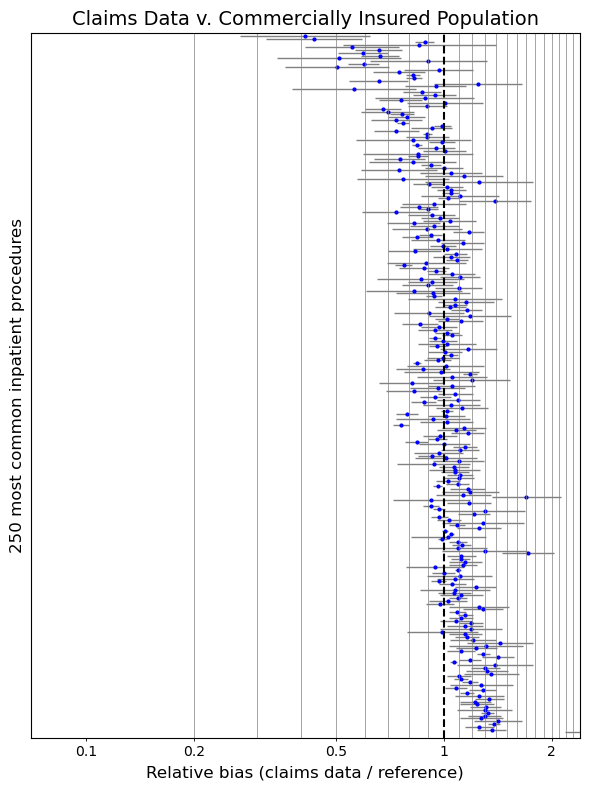

In [340]:
plt.figure(figsize=(6,8))

# df_temp = df_procs.sort_values(by = 'rate_SID', ascending=False)[1:251].sort_values(by='rel_bias').copy()
# df_temp = df_procs.sort_values(by = 'rate_SID', ascending=False)[1:101].sort_values(by='rel_bias').copy()
# df_temp = df_procs.copy()
df_procs['procedure'] = pd.Categorical(df_procs['procedure'], categories=plot_order, ordered=True)
df_temp = df_procs[df_procs.procedure.isin(plot_order)].sort_values(by = 'procedure').copy()


err = np.array([np.array(df_temp['rel_bias']        - df_temp['rel_bias_low'])  ,
                np.array(df_temp['rel_bias_high']   - df_temp['rel_bias'])   ])

plt.scatter(df_temp['rel_bias'],df_temp['procedure'],  s=4, zorder=2,
             color='blue')
plt.barh(df_temp['procedure'], df_temp['rel_bias'], xerr=err, facecolor='none', 
         error_kw=dict(lw=1, capsize=0, capthick=0, ecolor='gray'), zorder=1)


plt.xscale('log')
plt.gca().invert_yaxis()

plt.xlabel('Relative bias (claims data / reference)', fontsize=12)
plt.ylabel('250 most common inpatient procedures', fontsize=12)

plt.title('Claims Data v. Commercially Insured Population', fontsize=14)


plt.axvline(1,linestyle='--', color='k', lw=1.5)
#plt.axvline(df_procs[df_procs.procedure == 'Overall Inpatient Visits'].rel_bias.values[0],linestyle=':', color='gray', lw=1)
plt.axvline(.2, color='gray', linewidth=0.5)
plt.axvline(.3, color='gray', linewidth=0.5)
plt.axvline(.4, color='gray', linewidth=0.5)
plt.axvline(.5, color='gray', linewidth=0.5)
plt.axvline(.6, color='gray', linewidth=0.5)
plt.axvline(.7, color='gray', linewidth=0.5)
plt.axvline(.8, color='gray', linewidth=0.5)
plt.axvline(.9, color='gray', linewidth=0.5)
plt.axvline(1.1, color='gray', linewidth=0.5)
plt.axvline(1.2, color='gray', linewidth=0.5)
plt.axvline(1.3, color='gray', linewidth=0.5)
plt.axvline(1.4, color='gray', linewidth=0.5)
plt.axvline(1.5, color='gray', linewidth=0.5)
plt.axvline(1.6, color='gray', linewidth=0.5)
plt.axvline(1.7, color='gray', linewidth=0.5)
plt.axvline(1.8, color='gray', linewidth=0.5)
plt.axvline(1.9, color='gray', linewidth=0.5)
plt.axvline(2.0, color='gray', linewidth=0.5)
plt.axvline(2.1, color='gray', linewidth=0.5)
plt.axvline(2.2, color='gray', linewidth=0.5)
plt.axvline(2.3, color='gray', linewidth=0.5)
plt.axvline(2.4, color='gray', linewidth=0.5)
plt.xlim([0.07, 2.4])

plt.ylim([251, -1])

ax = plt.gca()
locs = np.array([.1, 0.2, 0.5,  1, 2, 5, 10])
labels = np.array(['0.1', '0.2', '0.5', '1', '2', '5','10'])

ax.xaxis.set_minor_locator(ticker.FixedLocator(locs))
ax.xaxis.set_minor_formatter(ticker.FixedFormatter(labels))
ax.xaxis.set_major_locator(ticker.NullLocator())

ax.yaxis.set_major_locator(ticker.NullLocator())
ax.yaxis.set_minor_locator(ticker.NullLocator())

plt.tight_layout()
plt.savefig('caterpillar_com_insured.jpg', dpi = 800)

In [341]:
rate_tbl_com = df_temp[['PRCCSR', 'procedure', 'rate_SID', 'sid_low', 'sid_high', 'rate_MS', 'ms_low', 'ms_high', 'rel_bias', 'rel_bias_low', 'rel_bias_high']]

In [342]:
rate_tbl_com

,PRCCSR,procedure,rate_SID,sid_low,sid_high,rate_MS,ms_low,ms_high,rel_bias,rel_bias_low,rel_bias_high
262,FRS013,Subcutaneous contraceptive implant,0.00235,0.00233,0.00237,0.00096,0.00056,0.00136,0.40851,0.26897,0.62046
44,MAM004,Cardiac stress tests,0.00403,0.00400,0.00405,0.00174,0.00120,0.00229,0.43327,0.31780,0.59071
127,ESA001,Hemodialysis,0.05214,0.05206,0.05222,0.04602,0.04325,0.04880,0.88269,0.83098,0.93761
105,MST026,Finger and other upper extremity amputation,0.00082,0.00081,0.00083,0.00070,0.00036,0.00104,0.85387,0.52302,1.39400
7,ADM020,"Administration of diagnostic substances, NEC",0.00330,0.00328,0.00332,0.00183,0.00128,0.00239,0.55471,0.40992,0.75066
...,...,...,...,...,...,...,...,...,...,...,...
3,ADM011,"Administration and transfusion of bone marrow,...",0.00490,0.00488,0.00493,0.00694,0.00586,0.00801,1.41517,1.21134,1.65330
131,MST007,Hip arthroplasty,0.08018,0.08008,0.08028,0.11063,0.10633,0.11494,1.37985,1.32715,1.43464
31,SKB004,Breast reconstruction,0.01570,0.01565,0.01574,0.01972,0.01790,0.02154,1.25613,1.14545,1.37750
229,MRS003,Prostatectomy,0.01358,0.01354,0.01363,0.01845,0.01669,0.02021,1.35842,1.23488,1.49432


In [343]:
sorted_rates = rate_tbl_com.sort_values(by='rel_bias', ascending=True)

In [344]:
# if the confidence intervals of the relative bias overlap 1 -> not statistically significant
sorted_rates['significant'] = np.where(
    (1 - sorted_rates['rel_bias_low']) * (1 - sorted_rates['rel_bias_high']) > 0, 1, 0)

In [345]:
sorted_rates[sorted_rates['significant'] == 0][['rel_bias_low', 'rel_bias_high', 'significant']]

,rel_bias_low,rel_bias_high,significant
40,0.57082,1.03092,0
275,0.65920,1.00128,0
77,0.61771,1.08160,0
184,0.56646,1.18850,0
94,0.60464,1.12397,0
...,...,...,...
78,0.93174,1.53321,0
210,0.94023,1.65606,0
96,0.88667,1.77361,0
22,0.99072,1.67325,0


In [346]:
sorted_rates['significant'].describe()

count   250.00000
mean      0.48400
std       0.50075
min       0.00000
25%       0.00000
50%       0.00000
75%       1.00000
max       1.00000
Name: significant, dtype: float64

In [347]:
percentiles = [x * 0.1 for x in range(11, 21)]

In [348]:
percentiles.reverse()
for i in percentiles:
    sorted_rates['bias_pct'] = np.where(sorted_rates['rel_bias'] <= 1/i, 1, 0)
    print(round(sorted_rates['bias_pct'].mean() * 100, 1))

0.8
1.6
2.0
2.4
3.2
4.4
5.2
9.6
14.4
24.8


In [349]:
percentiles.reverse()
for i in percentiles:
    sorted_rates['bias_pct'] = np.where(sorted_rates['rel_bias'] >= i, 1, 0)
    print(round(sorted_rates['bias_pct'].mean() * 100, 1))

32.4
15.6
8.4
2.4
1.2
1.2
0.8
0.4
0.4
0.4


In [350]:
percentiles = [x * 0.1 for x in range(11, 21)]

percentiles.reverse()
for i in percentiles:
    sorted_rates['bias_pct'] = np.where(sorted_rates['rel_bias'] <= 1/i, 1, 0)
    print(round(sorted_rates['bias_pct'].mean() * 100, 1))

percentiles.reverse()
for i in percentiles:
    sorted_rates['bias_pct'] = np.where(sorted_rates['rel_bias'] >= i, 1, 0)
    print(round(sorted_rates['bias_pct'].mean() * 100, 1))sorted_rates['bias_pct'] = np.where(
    sorted_rates['rel_bias'] >= 2, 1, 0)
sorted_rates['bias_pct'].describe()

SyntaxError: invalid syntax (2576600422.py, line 11)

In [351]:
rate_tbl_com_export = rate_tbl_com.copy()
rate_tbl_com_export['sid_err'] = round(rate_tbl_com['sid_high'] - rate_tbl_com['rate_SID'], 5)
rate_tbl_com_export['rate / 100 patient years (reference)'] = rate_tbl_com['rate_SID'].apply(lambda x: '{:.5f}'.format(x)) + ' ± ' + rate_tbl_com_export['sid_err'].apply(lambda x: '{:.5f}'.format(x))
rate_tbl_com_export['relative bias'] = rate_tbl_com['rel_bias'].apply(lambda x: '{:.3f}'.format(x)) + ' [' + rate_tbl_com['rel_bias_low'].apply(lambda x: '{:.3f}'.format(x)) + ', ' + rate_tbl_com['rel_bias_high'].apply(lambda x: '{:.3f}'.format(x)) + ']'
rate_tbl_com_export = pd.merge(rate_tbl_com_export, sid_rate_order, on = 'procedure', how = 'left').sort_values(by = 'order')

In [356]:
rate_tbl_com_export.head()

,PRCCSR,procedure,rate_SID,sid_low,sid_high,rate_MS,ms_low,ms_high,rel_bias,rel_bias_low,rel_bias_high,sid_err,rate / 100 patient years (reference),relative bias,order
178,PGN002,Spontaneous vaginal delivery,0.81705,0.81673,0.81737,0.85784,0.84585,0.86983,1.04992,1.03534,1.06471,0.00032,0.81705 ± 0.00032,"1.050 [1.035, 1.065]",0
191,PGN003,Cesarean section,0.39858,0.39835,0.39881,0.43559,0.42705,0.44414,1.09287,1.07163,1.11452,0.00023,0.39858 ± 0.00023,"1.093 [1.072, 1.115]",1
177,PGN004,Assisted vaginal delivery,0.37068,0.37046,0.37090,0.37343,0.36552,0.38134,1.00742,0.98629,1.02899,0.00022,0.37068 ± 0.00022,"1.007 [0.986, 1.029]",2
117,PGN001,Fetal heart rate monitoring,0.31664,0.31644,0.31684,0.26690,0.26021,0.27359,0.84290,0.82203,0.86429,0.00020,0.31664 ± 0.00020,"0.843 [0.822, 0.864]",3
35,CAR024,Venous and arterial catheter placement,0.20176,0.20160,0.20192,0.18144,0.17592,0.18695,0.89927,0.87234,0.92703,0.00016,0.20176 ± 0.00016,"0.899 [0.872, 0.927]",4


In [353]:
rate_tbl_com_export.to_csv('rate_tbl_commercial.csv', index = False)